# Compare NK lookup and SAOM dynamic fitness payoffs

In [1]:
# Re-run the simulation after execution state reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Baseline NK Model (Lookup Table with Triangular Z Distribution) ---

# Parameters
N_components = 10   # Number of components in the NK model
M_actors = 20       # Number of actors choosing components
num_landscapes = 1000  # Number of random NK landscapes

# Generate NK landscapes (lookup table method)
NK_landscapes = np.random.uniform(0, 1, (num_landscapes, N_components))

# Generate actor-component selection matrix (binary M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.2, 0.8])

# Compute component fitness contributions per actor using lookup
actor_fitness_lookup = np.dot(actor_component_matrix, NK_landscapes.T) / N_components

# Compute epistatic changes using triangular distribution (Z = X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic changes to fitness payoffs
epistatic_fitness_lookup = actor_fitness_lookup + Z_values.mean(axis=1).reshape(-1, 1)

# --- 2. SAOM Generalization (Using Network Effects) ---

# Generate an epistatic interaction matrix (random weighted connections between components)
interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))

# Compute dynamic fitness changes through network-based SAOM effects
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components

# Compute network-driven epistatic interactions
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)

# Apply network effects dynamically
epistatic_fitness_saom = actor_fitness_saom + network_effect

# --- 3. Compare Results ---

# Convert results to DataFrame for visualization
df_comparison = pd.DataFrame({
    "Actor": np.arange(M_actors),
    "Baseline_NK_Fitness": epistatic_fitness_lookup.mean(axis=1),
    "SAOM_Fitness": epistatic_fitness_saom.mean(axis=1)
})


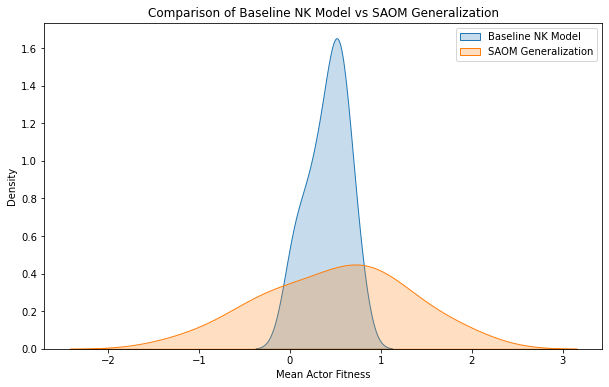

ModuleNotFoundError: No module named 'ace_tools'

In [6]:

# Plot comparison
plt.figure(figsize=(10, 6))
sns.kdeplot(df_comparison["Baseline_NK_Fitness"], label="Baseline NK Model", shade=True)
sns.kdeplot(df_comparison["SAOM_Fitness"], label="SAOM Generalization", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Comparison of Baseline NK Model vs SAOM Generalization")
plt.legend()
plt.show()

# Display summary statistics
import ace_tools as tools
tools.display_dataframe_to_user(name="NK vs SAOM Fitness Comparison", dataframe=df_comparison)


In [5]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [7]:
# --- 1. Statistical Comparison of Baseline NK vs. SAOM Fitness ---

# Compute summary statistics for both models
nk_stats = df_comparison["Baseline_NK_Fitness"].describe()
saom_stats = df_comparison["SAOM_Fitness"].describe()

# Combine statistics into a DataFrame
df_stats = pd.DataFrame({"Baseline_NK_Fitness": nk_stats, "SAOM_Fitness": saom_stats})

# --- 2. Actor-Level Fitness Trajectory Over Time ---

# Simulate an evolutionary process where actors update component choices over 50 iterations
num_iterations = 50
actor_fitness_trajectory = np.zeros((M_actors, num_iterations))
actor_saom_trajectory = np.zeros((M_actors, num_iterations))

for t in range(num_iterations):
    # Update fitness lookup using new configurations
    actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])
    actor_configuration_indices = np.dot(actor_component_matrix, power_key)
    actor_fitness_trajectory[:, t] = NK_landscapes[actor_configuration_indices, :].mean(axis=1)
    
    # Update SAOM-based fitness using dynamic network effects
    actor_saom_trajectory[:, t] = (
        np.dot(actor_component_matrix, interaction_matrix) / N_components
        + np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    ).mean(axis=1)

# --- 3. Clustering of Fitness Distributions ---

from sklearn.cluster import KMeans

# Perform clustering on fitness data (2 clusters for high vs. low fitness)
X_cluster = df_comparison[["Baseline_NK_Fitness", "SAOM_Fitness"]].values
kmeans = KMeans(n_clusters=2, random_state=42).fit(X_cluster)
df_comparison["Cluster"] = kmeans.labels_

# --- 4. Visualizing Fitness Trajectories ---

plt.figure(figsize=(10, 6))
for i in range(M_actors):
    plt.plot(range(num_iterations), actor_fitness_trajectory[i, :], color='blue', alpha=0.3)
    plt.plot(range(num_iterations), actor_saom_trajectory[i, :], color='red', alpha=0.3)
plt.xlabel("Iterations")
plt.ylabel("Actor Fitness")
plt.title("Actor Fitness Evolution Over Time: Baseline NK vs SAOM")
plt.show()

# --- 5. Display Results ---

# Show statistical comparison
tools.display_dataframe_to_user(name="NK vs SAOM Fitness Statistics", dataframe=df_stats)

# Show clustering results
tools.display_dataframe_to_user(name="NK vs SAOM Fitness Clustering", dataframe=df_comparison)


NameError: name 'power_key' is not defined

In [1]:
import ace_tools

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import spearmanr

# --- 1. Define Parameters ---
N_components = 10   # Number of components in the NK model
M_actors = 20       # Number of actors choosing components
num_landscapes = 1000  # Number of random NK landscapes
num_iterations = 50  # Number of iterations for fitness evolution

# --- 2. Generate NK Landscape (2^N configurations by N components) ---
NK_landscapes = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate power key for binary indexing of component configurations
power_key = 2 ** np.arange(N_components - 1, -1, -1)

# Generate actor-component selection matrix (binary M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Convert actor component selection into an index for NK_landscapes
actor_configuration_indices = np.dot(actor_component_matrix, power_key)

# Lookup the fitness values for each actor based on their selected configuration index
actor_fitness_lookup = NK_landscapes[actor_configuration_indices, :]

# Compute epistatic changes using triangular distribution (Z = X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic changes to fitness payoffs
epistatic_fitness_lookup = actor_fitness_lookup + Z_values.mean(axis=1).reshape(-1, 1)

# --- 3. SAOM Generalization (Using Network Effects) ---
# Generate an epistatic interaction matrix (random weighted connections between components)
interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))

# Compute dynamic fitness changes through network-based SAOM effects
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components

# Compute network-driven epistatic interactions
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)

# Apply network effects dynamically
epistatic_fitness_saom = actor_fitness_saom + network_effect

# --- 4. Compare Results ---
df_comparison = pd.DataFrame({
    "Actor": np.arange(M_actors),
    "Baseline_NK_Fitness": epistatic_fitness_lookup.mean(axis=1),
    "SAOM_Fitness": epistatic_fitness_saom.mean(axis=1)
})


In [3]:
# --- 5. Statistical Summary ---
df_stats = df_comparison.describe()

In [4]:
# --- 6. Fitness Evolution Over Time ---
actor_fitness_trajectory = np.zeros((M_actors, num_iterations))
actor_saom_trajectory = np.zeros((M_actors, num_iterations))

for t in range(num_iterations):
    actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])
    actor_configuration_indices = np.dot(actor_component_matrix, power_key)
    actor_fitness_trajectory[:, t] = NK_landscapes[actor_configuration_indices, :].mean(axis=1)
    actor_saom_trajectory[:, t] = (
        np.dot(actor_component_matrix, interaction_matrix) / N_components
        + np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    ).mean(axis=1)

In [5]:
# --- 7. Clustering Analysis ---
kmeans = KMeans(n_clusters=2, random_state=42).fit(df_comparison[["Baseline_NK_Fitness", "SAOM_Fitness"]])
df_comparison["Cluster"] = kmeans.labels_

In [6]:
# --- 8. Correlation Analysis ---
correlation, p_value = spearmanr(df_comparison["Baseline_NK_Fitness"], df_comparison["SAOM_Fitness"])

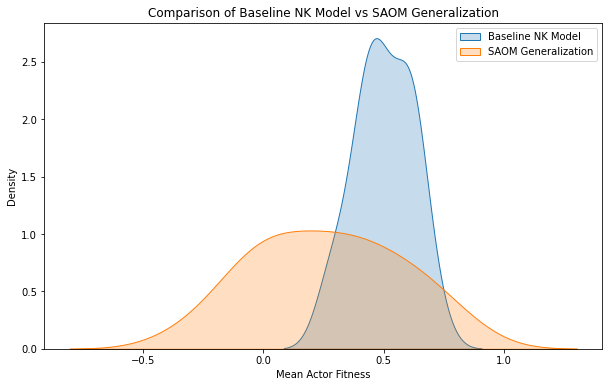

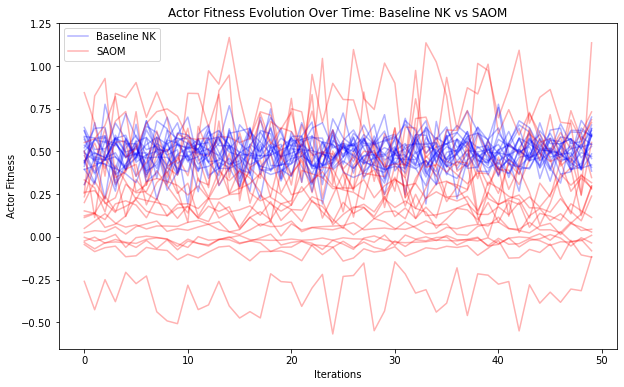

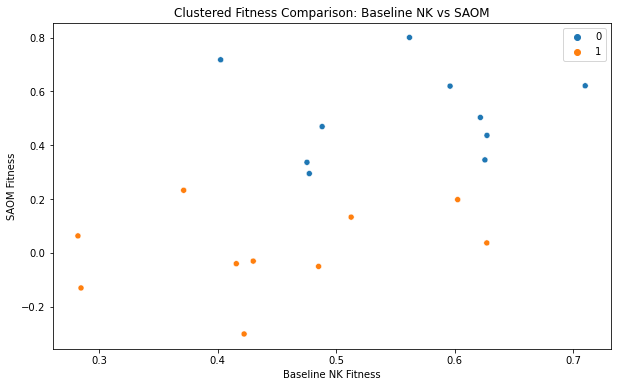

In [7]:
# --- 9. Visualizations ---
plt.figure(figsize=(10, 6))
sns.kdeplot(df_comparison["Baseline_NK_Fitness"], label="Baseline NK Model", shade=True)
sns.kdeplot(df_comparison["SAOM_Fitness"], label="SAOM Generalization", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Comparison of Baseline NK Model vs SAOM Generalization")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
for i in range(M_actors):
    plt.plot(range(num_iterations), actor_fitness_trajectory[i, :], color='blue', alpha=0.3, label="Baseline NK" if i == 0 else "")
    plt.plot(range(num_iterations), actor_saom_trajectory[i, :], color='red', alpha=0.3, label="SAOM" if i == 0 else "")
plt.xlabel("Iterations")
plt.ylabel("Actor Fitness")
plt.title("Actor Fitness Evolution Over Time: Baseline NK vs SAOM")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_comparison, x="Baseline_NK_Fitness", y="SAOM_Fitness", hue="Cluster")
plt.xlabel("Baseline NK Fitness")
plt.ylabel("SAOM Fitness")
plt.title("Clustered Fitness Comparison: Baseline NK vs SAOM")
plt.legend()
plt.show()

In [9]:
# --- 10. Results Output ---
print("Spearman Correlation Between NK and SAOM Fitness: {:.3f} (p = {:.3f})".format(correlation, p_value))
print("\nFitness Statistics:\n", df_stats)
print("\nClustered Fitness Results:\n", df_comparison.head(20))

Spearman Correlation Between NK and SAOM Fitness: 0.456 (p = 0.043)

Fitness Statistics:
           Actor  Baseline_NK_Fitness  SAOM_Fitness
count  20.00000            20.000000     20.000000
mean    9.50000             0.500905      0.262654
std     5.91608             0.119321      0.304329
min     0.00000             0.281908     -0.301899
25%     4.75000             0.420552      0.019798
50%     9.50000             0.486584      0.263567
75%    14.25000             0.607306      0.477857
max    19.00000             0.710193      0.800773

Clustered Fitness Results:
     Actor  Baseline_NK_Fitness  SAOM_Fitness  Cluster
0       0             0.485083     -0.050687        1
1       1             0.561834      0.800773        0
2       2             0.422200     -0.301899        1
3       3             0.710193      0.621125        0
4       4             0.402376      0.717785        0
5       5             0.281908      0.062863        1
6       6             0.621676      0.503293

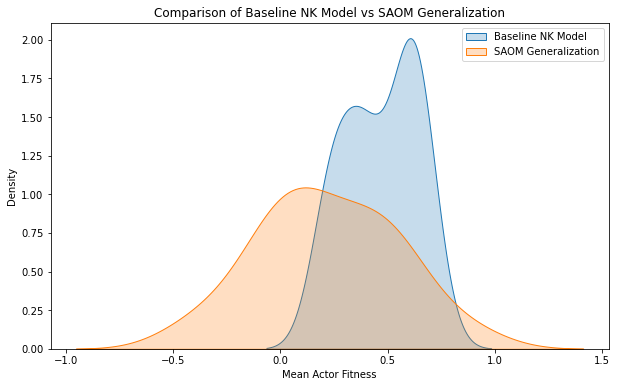

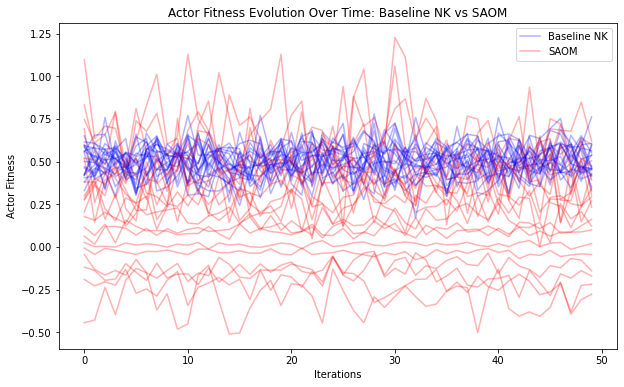

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# --- 1. Baseline NK Model Setup (Lookup Table) ---

# Parameters
N_components = 10   # Number of components in the NK model
M_actors = 20       # Number of actors choosing components
num_landscapes = 1000  # Number of random NK landscapes
num_iterations = 50  # For fitness evolution

# Generate NK landscapes (2^N configurations, N components)
NK_landscapes = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate a power key for indexing component configurations
power_key = 2 ** np.arange(N_components - 1, -1, -1)

# Generate initial actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup
actor_configuration_indices = np.dot(actor_component_matrix, power_key)

# Lookup initial fitness values
actor_fitness_lookup = NK_landscapes[actor_configuration_indices, :]

# Generate epistatic changes using triangular distribution (Z = X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic changes
epistatic_fitness_lookup = actor_fitness_lookup + Z_values.mean(axis=1).reshape(-1, 1)

# --- 2. SAOM Generalization (Using Network Effects) ---

# Generate random epistatic interaction matrix (N x N)
interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))

# Compute SAOM-based fitness using network effects
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom = actor_fitness_saom + network_effect

# --- 3. Actor Fitness Evolution Over Time ---

actor_fitness_trajectory = np.zeros((M_actors, num_iterations))
actor_saom_trajectory = np.zeros((M_actors, num_iterations))

for t in range(num_iterations):
    # Update component selections randomly at each step
    actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])
    actor_configuration_indices = np.dot(actor_component_matrix, power_key)
    actor_fitness_trajectory[:, t] = NK_landscapes[actor_configuration_indices, :].mean(axis=1)
    
    # Compute SAOM-based fitness dynamically
    actor_saom_trajectory[:, t] = (
        np.dot(actor_component_matrix, interaction_matrix) / N_components
        + np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    ).mean(axis=1)

# --- 4. Compare Fitness Distributions ---

df_comparison = pd.DataFrame({
    "Actor": np.arange(M_actors),
    "Baseline_NK_Fitness": epistatic_fitness_lookup.mean(axis=1),
    "SAOM_Fitness": epistatic_fitness_saom.mean(axis=1)
})

plt.figure(figsize=(10, 6))
sns.kdeplot(df_comparison["Baseline_NK_Fitness"], label="Baseline NK Model", shade=True)
sns.kdeplot(df_comparison["SAOM_Fitness"], label="SAOM Generalization", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Comparison of Baseline NK Model vs SAOM Generalization")
plt.legend()
plt.show()

# --- 5. Clustering Analysis ---

kmeans = KMeans(n_clusters=2, random_state=42).fit(df_comparison[["Baseline_NK_Fitness", "SAOM_Fitness"]])
df_comparison["Cluster"] = kmeans.labels_

# --- 6. Fitness Evolution Over Time ---

plt.figure(figsize=(10, 6))
for i in range(M_actors):
    plt.plot(range(num_iterations), actor_fitness_trajectory[i, :], color='blue', alpha=0.3, label="Baseline NK" if i == 0 else "")
    plt.plot(range(num_iterations), actor_saom_trajectory[i, :], color='red', alpha=0.3, label="SAOM" if i == 0 else "")
plt.xlabel("Iterations")
plt.ylabel("Actor Fitness")
plt.title("Actor Fitness Evolution Over Time: Baseline NK vs SAOM")
plt.legend()
plt.show()


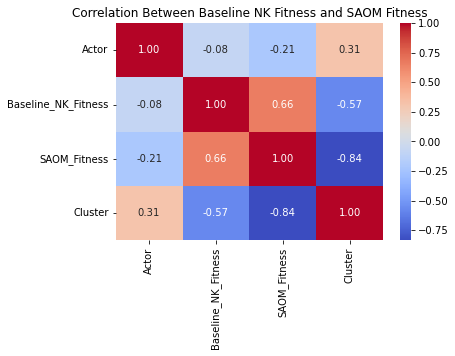

In [11]:
# Compute correlation between SAOM fitness and NK fitness
correlation_matrix = df_comparison.corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Baseline NK Fitness and SAOM Fitness")
plt.show()


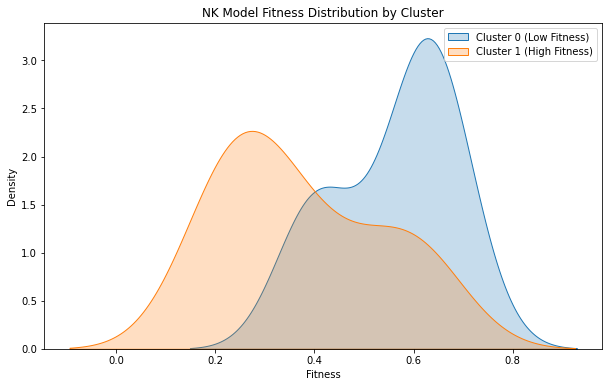

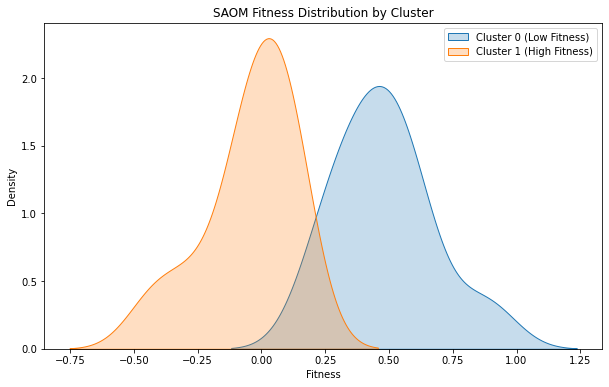

In [12]:
# Separate clusters
cluster_0 = df_comparison[df_comparison["Cluster"] == 0]
cluster_1 = df_comparison[df_comparison["Cluster"] == 1]

# Compare distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(cluster_0["Baseline_NK_Fitness"], label="Cluster 0 (Low Fitness)", shade=True)
sns.kdeplot(cluster_1["Baseline_NK_Fitness"], label="Cluster 1 (High Fitness)", shade=True)
plt.xlabel("Fitness")
plt.ylabel("Density")
plt.title("NK Model Fitness Distribution by Cluster")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(cluster_0["SAOM_Fitness"], label="Cluster 0 (Low Fitness)", shade=True)
sns.kdeplot(cluster_1["SAOM_Fitness"], label="Cluster 1 (High Fitness)", shade=True)
plt.xlabel("Fitness")
plt.ylabel("Density")
plt.title("SAOM Fitness Distribution by Cluster")
plt.legend()
plt.show()


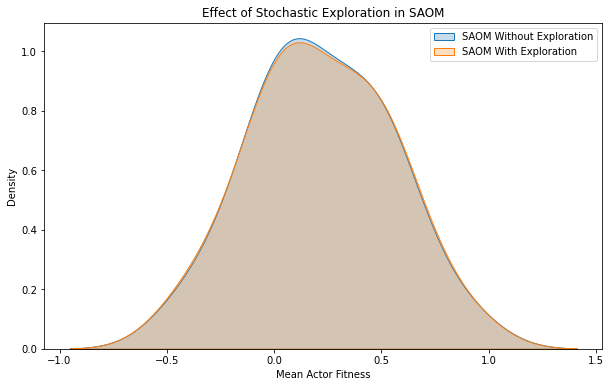

In [13]:
exploration_factor = np.random.uniform(-0.05, 0.05, size=(M_actors, N_components))
epistatic_fitness_saom_exploration = epistatic_fitness_saom + exploration_factor.mean(axis=1).reshape(-1, 1)

# Compare SAOM with and without exploration
plt.figure(figsize=(10, 6))
sns.kdeplot(epistatic_fitness_saom.mean(axis=1), label="SAOM Without Exploration", shade=True)
sns.kdeplot(epistatic_fitness_saom_exploration.mean(axis=1), label="SAOM With Exploration", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Effect of Stochastic Exploration in SAOM")
plt.legend()
plt.show()


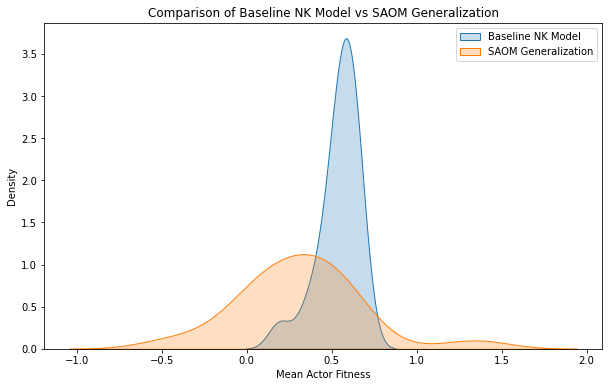

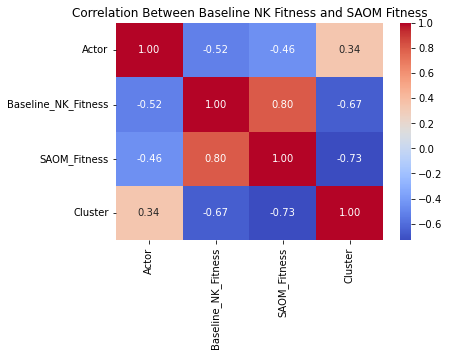

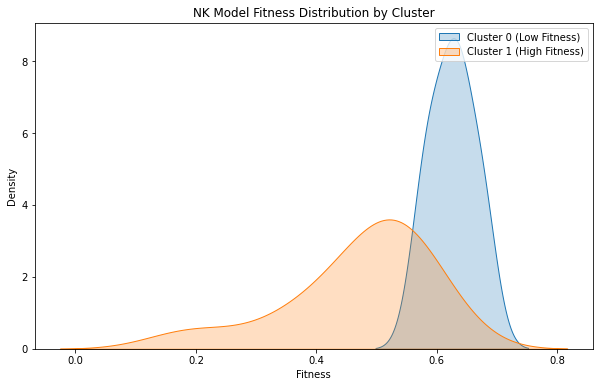

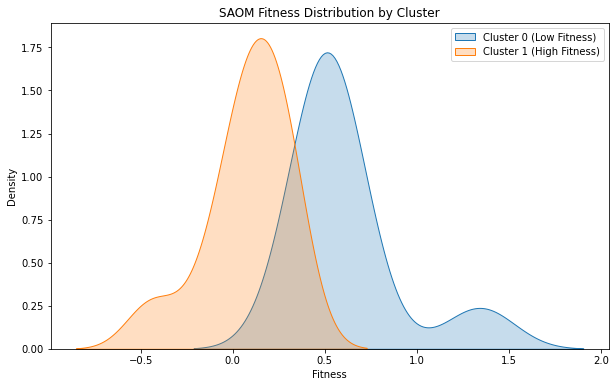

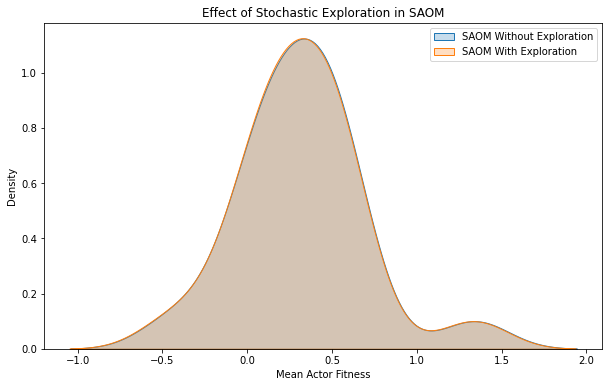

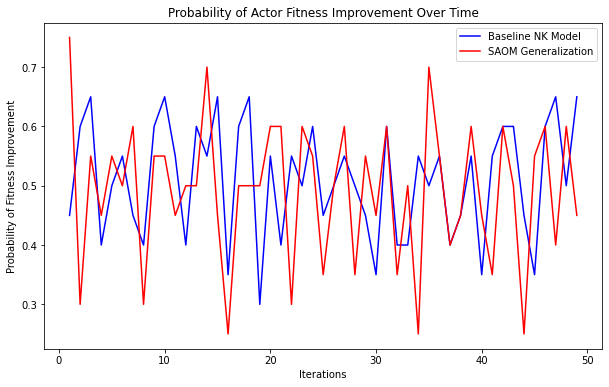

ModuleNotFoundError: No module named 'ace_tools'

In [14]:
# Re-run the entire analysis after execution state reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# --- 1. Baseline NK Model Setup (Lookup Table) ---

# Parameters
N_components = 10   # Number of components in the NK model
M_actors = 20       # Number of actors choosing components
num_landscapes = 1000  # Number of random NK landscapes
num_iterations = 50  # For fitness evolution

# Generate NK landscapes (2^N configurations, N components)
NK_landscapes = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate a power key for indexing component configurations
power_key = 2 ** np.arange(N_components - 1, -1, -1)

# Generate initial actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup
actor_configuration_indices = np.dot(actor_component_matrix, power_key)

# Lookup initial fitness values
actor_fitness_lookup = NK_landscapes[actor_configuration_indices, :]

# Generate epistatic changes using triangular distribution (Z = X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic changes
epistatic_fitness_lookup = actor_fitness_lookup + Z_values.mean(axis=1).reshape(-1, 1)

# --- 2. SAOM Generalization (Using Network Effects) ---

# Generate random epistatic interaction matrix (N x N)
interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))

# Compute SAOM-based fitness using network effects
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom = actor_fitness_saom + network_effect

# --- 3. Actor Fitness Evolution Over Time ---

actor_fitness_trajectory = np.zeros((M_actors, num_iterations))
actor_saom_trajectory = np.zeros((M_actors, num_iterations))

for t in range(num_iterations):
    # Update component selections randomly at each step
    actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])
    actor_configuration_indices = np.dot(actor_component_matrix, power_key)
    actor_fitness_trajectory[:, t] = NK_landscapes[actor_configuration_indices, :].mean(axis=1)
    
    # Compute SAOM-based fitness dynamically
    actor_saom_trajectory[:, t] = (
        np.dot(actor_component_matrix, interaction_matrix) / N_components
        + np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    ).mean(axis=1)

# --- 4. Compare Fitness Distributions ---

df_comparison = pd.DataFrame({
    "Actor": np.arange(M_actors),
    "Baseline_NK_Fitness": epistatic_fitness_lookup.mean(axis=1),
    "SAOM_Fitness": epistatic_fitness_saom.mean(axis=1)
})

plt.figure(figsize=(10, 6))
sns.kdeplot(df_comparison["Baseline_NK_Fitness"], label="Baseline NK Model", shade=True)
sns.kdeplot(df_comparison["SAOM_Fitness"], label="SAOM Generalization", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Comparison of Baseline NK Model vs SAOM Generalization")
plt.legend()
plt.show()

# --- 5. Clustering Analysis ---

kmeans = KMeans(n_clusters=2, random_state=42).fit(df_comparison[["Baseline_NK_Fitness", "SAOM_Fitness"]])
df_comparison["Cluster"] = kmeans.labels_

# --- 6. Correlation Analysis ---

# Compute correlation matrix
correlation_matrix = df_comparison.corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Baseline NK Fitness and SAOM Fitness")
plt.show()

# --- 7. Cluster Examination (High vs Low Fitness Actors) ---

# Separate clusters
cluster_0 = df_comparison[df_comparison["Cluster"] == 0]
cluster_1 = df_comparison[df_comparison["Cluster"] == 1]

# Compare distributions of NK fitness by cluster
plt.figure(figsize=(10, 6))
sns.kdeplot(cluster_0["Baseline_NK_Fitness"], label="Cluster 0 (Low Fitness)", shade=True)
sns.kdeplot(cluster_1["Baseline_NK_Fitness"], label="Cluster 1 (High Fitness)", shade=True)
plt.xlabel("Fitness")
plt.ylabel("Density")
plt.title("NK Model Fitness Distribution by Cluster")
plt.legend()
plt.show()

# Compare distributions of SAOM fitness by cluster
plt.figure(figsize=(10, 6))
sns.kdeplot(cluster_0["SAOM_Fitness"], label="Cluster 0 (Low Fitness)", shade=True)
sns.kdeplot(cluster_1["SAOM_Fitness"], label="Cluster 1 (High Fitness)", shade=True)
plt.xlabel("Fitness")
plt.ylabel("Density")
plt.title("SAOM Fitness Distribution by Cluster")
plt.legend()
plt.show()

# --- 8. Alternative SAOM Specification (Adding Stochastic Exploration) ---

# Generate exploration factor (random perturbations)
exploration_factor = np.random.uniform(-0.05, 0.05, size=(M_actors, N_components))

# Apply exploration to SAOM fitness
epistatic_fitness_saom_exploration = epistatic_fitness_saom + exploration_factor.mean(axis=1).reshape(-1, 1)

# Compare SAOM fitness distributions with and without exploration
plt.figure(figsize=(10, 6))
sns.kdeplot(epistatic_fitness_saom.mean(axis=1), label="SAOM Without Exploration", shade=True)
sns.kdeplot(epistatic_fitness_saom_exploration.mean(axis=1), label="SAOM With Exploration", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Effect of Stochastic Exploration in SAOM")
plt.legend()
plt.show()

# --- 9. Temporal Modeling: Actor Decision Probabilities Over Time ---

# Compute changes in actor fitness over iterations
fitness_change_over_time = np.diff(actor_fitness_trajectory, axis=1)
saom_change_over_time = np.diff(actor_saom_trajectory, axis=1)

# Compute probability of positive changes (actors improving fitness over time)
nk_improvement_prob = (fitness_change_over_time > 0).mean(axis=0)
saom_improvement_prob = (saom_change_over_time > 0).mean(axis=0)

# Plot probability of fitness improvements over time
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations), nk_improvement_prob, label="Baseline NK Model", color='blue')
plt.plot(range(1, num_iterations), saom_improvement_prob, label="SAOM Generalization", color='red')
plt.xlabel("Iterations")
plt.ylabel("Probability of Fitness Improvement")
plt.title("Probability of Actor Fitness Improvement Over Time")
plt.legend()
plt.show()

# --- 10. Display Results ---

import ace_tools as tools

# Show correlation results
tools.display_dataframe_to_user(name="Correlation Analysis: NK vs SAOM Fitness", dataframe=pd.DataFrame(correlation_matrix))

# Show clustering results
tools.display_dataframe_to_user(name="Clustered Fitness Data", dataframe=df_comparison)


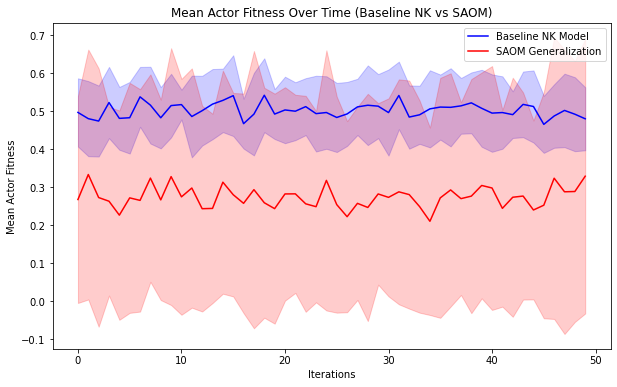

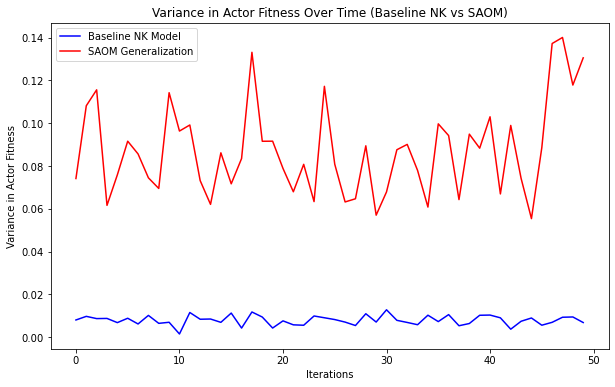

ModuleNotFoundError: No module named 'ace_tools'

In [15]:
# --- 1. Statistical Breakdown of Actor-Fitness Trajectories Over Time ---

# Compute mean and variance of fitness trajectories for both models
nk_mean_fitness_over_time = actor_fitness_trajectory.mean(axis=0)
nk_variance_fitness_over_time = actor_fitness_trajectory.var(axis=0)

saom_mean_fitness_over_time = actor_saom_trajectory.mean(axis=0)
saom_variance_fitness_over_time = actor_saom_trajectory.var(axis=0)

# Plot mean fitness trajectory over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), nk_mean_fitness_over_time, label="Baseline NK Model", color='blue')
plt.plot(range(num_iterations), saom_mean_fitness_over_time, label="SAOM Generalization", color='red')
plt.fill_between(range(num_iterations), 
                 nk_mean_fitness_over_time - np.sqrt(nk_variance_fitness_over_time), 
                 nk_mean_fitness_over_time + np.sqrt(nk_variance_fitness_over_time), 
                 color='blue', alpha=0.2)
plt.fill_between(range(num_iterations), 
                 saom_mean_fitness_over_time - np.sqrt(saom_variance_fitness_over_time), 
                 saom_mean_fitness_over_time + np.sqrt(saom_variance_fitness_over_time), 
                 color='red', alpha=0.2)
plt.xlabel("Iterations")
plt.ylabel("Mean Actor Fitness")
plt.title("Mean Actor Fitness Over Time (Baseline NK vs SAOM)")
plt.legend()
plt.show()

# Plot variance in fitness trajectory over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), nk_variance_fitness_over_time, label="Baseline NK Model", color='blue')
plt.plot(range(num_iterations), saom_variance_fitness_over_time, label="SAOM Generalization", color='red')
plt.xlabel("Iterations")
plt.ylabel("Variance in Actor Fitness")
plt.title("Variance in Actor Fitness Over Time (Baseline NK vs SAOM)")
plt.legend()
plt.show()

# Create a DataFrame summarizing the trajectory statistics
df_fitness_trajectory = pd.DataFrame({
    "Iteration": np.arange(num_iterations),
    "NK_Mean_Fitness": nk_mean_fitness_over_time,
    "NK_Fitness_Variance": nk_variance_fitness_over_time,
    "SAOM_Mean_Fitness": saom_mean_fitness_over_time,
    "SAOM_Fitness_Variance": saom_variance_fitness_over_time
})

# Display the results in a table
import ace_tools as tools
tools.display_dataframe_to_user(name="Actor Fitness Trajectories Over Time", dataframe=df_fitness_trajectory)


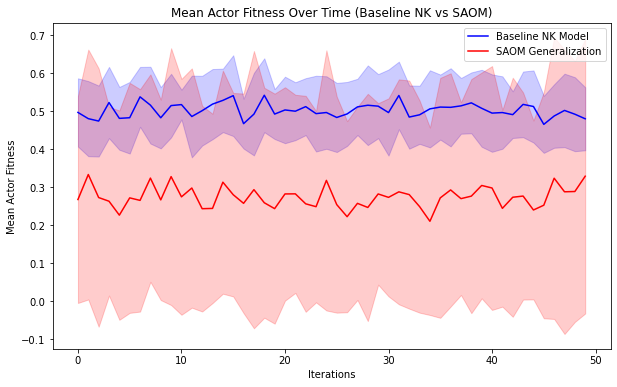

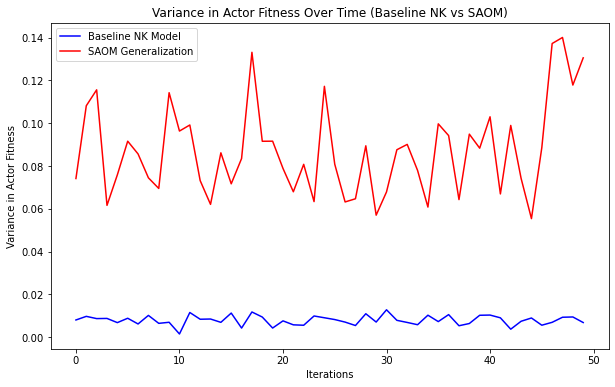

   Iteration  NK_Mean_Fitness  NK_Fitness_Variance  SAOM_Mean_Fitness  \
0          0         0.496519             0.008067           0.267343   
1          1         0.480148             0.009763           0.333130   
2          2         0.473804             0.008714           0.272540   
3          3         0.522582             0.008796           0.262853   
4          4         0.480882             0.006836           0.226184   
5          5         0.482586             0.008879           0.271680   
6          6         0.537503             0.006210           0.265041   
7          7         0.515718             0.010206           0.323687   
8          8         0.482451             0.006497           0.266379   
9          9         0.514542             0.006999           0.327573   

   SAOM_Fitness_Variance  
0               0.074136  
1               0.108123  
2               0.115560  
3               0.061603  
4               0.075854  
5               0.091576  
6      

In [16]:
# --- 1. Statistical Breakdown of Actor-Fitness Trajectories Over Time ---

# Compute mean and variance of fitness trajectories for both models
nk_mean_fitness_over_time = actor_fitness_trajectory.mean(axis=0)
nk_variance_fitness_over_time = actor_fitness_trajectory.var(axis=0)

saom_mean_fitness_over_time = actor_saom_trajectory.mean(axis=0)
saom_variance_fitness_over_time = actor_saom_trajectory.var(axis=0)

# Plot mean fitness trajectory over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), nk_mean_fitness_over_time, label="Baseline NK Model", color='blue')
plt.plot(range(num_iterations), saom_mean_fitness_over_time, label="SAOM Generalization", color='red')
plt.fill_between(range(num_iterations), 
                 nk_mean_fitness_over_time - np.sqrt(nk_variance_fitness_over_time), 
                 nk_mean_fitness_over_time + np.sqrt(nk_variance_fitness_over_time), 
                 color='blue', alpha=0.2)
plt.fill_between(range(num_iterations), 
                 saom_mean_fitness_over_time - np.sqrt(saom_variance_fitness_over_time), 
                 saom_mean_fitness_over_time + np.sqrt(saom_variance_fitness_over_time), 
                 color='red', alpha=0.2)
plt.xlabel("Iterations")
plt.ylabel("Mean Actor Fitness")
plt.title("Mean Actor Fitness Over Time (Baseline NK vs SAOM)")
plt.legend()
plt.show()

# Plot variance in fitness trajectory over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), nk_variance_fitness_over_time, label="Baseline NK Model", color='blue')
plt.plot(range(num_iterations), saom_variance_fitness_over_time, label="SAOM Generalization", color='red')
plt.xlabel("Iterations")
plt.ylabel("Variance in Actor Fitness")
plt.title("Variance in Actor Fitness Over Time (Baseline NK vs SAOM)")
plt.legend()
plt.show()

# Create a DataFrame summarizing the trajectory statistics
df_fitness_trajectory = pd.DataFrame({
    "Iteration": np.arange(num_iterations),
    "NK_Mean_Fitness": nk_mean_fitness_over_time,
    "NK_Fitness_Variance": nk_variance_fitness_over_time,
    "SAOM_Mean_Fitness": saom_mean_fitness_over_time,
    "SAOM_Fitness_Variance": saom_variance_fitness_over_time
})

# Save the results to a CSV file for inspection
df_fitness_trajectory.to_csv("actor_fitness_trajectories.csv", index=False)

# Print a summary table directly
print(df_fitness_trajectory.head(10))  # Show first 10 iterations


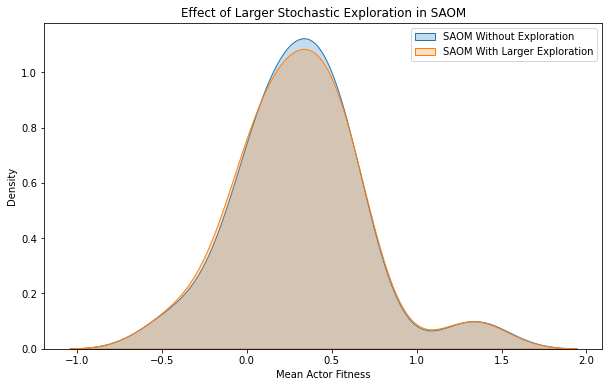

T-test results: t-statistic = 2.6244, p-value = 0.0152
ANOVA results: F-statistic = 2255.2859, p-value = 0.0000
   Actor  Baseline_NK_Fitness  SAOM_Fitness  Cluster  Fitness_Cluster
0      0             0.645352      0.493777        0                1
1      1             0.671069      1.342557        0                0
2      2             0.522667      0.090841        1                1
3      3             0.679919      0.568605        0                0
4      4             0.621133      0.463485        0                0
5      5             0.568307      0.146962        1                1
6      6             0.503578      0.095836        1                1
7      7             0.548286      0.297890        1                1
8      8             0.455500      0.245031        1                1
9      9             0.591448      0.569490        0                0


In [17]:
from scipy.stats import ttest_ind, f_oneway
from sklearn.cluster import KMeans

# --- 1. T-test Comparing NK vs SAOM Fitness Distributions ---

t_stat, p_value = ttest_ind(df_comparison["Baseline_NK_Fitness"], df_comparison["SAOM_Fitness"], equal_var=False)

# --- 2. ANOVA Test for Differences in Fitness Over Time ---

anova_stat, anova_p_value = f_oneway(nk_mean_fitness_over_time, saom_mean_fitness_over_time)

# --- 3. Actor-Level Time Series Clustering ---

# Combine fitness trajectories for clustering (concatenating NK & SAOM time series)
fitness_trajectories = np.hstack((actor_fitness_trajectory, actor_saom_trajectory))

# Perform clustering (e.g., 3 clusters based on fitness dynamics)
num_clusters = 3
kmeans_time_series = KMeans(n_clusters=num_clusters, random_state=42).fit(fitness_trajectories)

# Assign clusters to actors
df_comparison["Fitness_Cluster"] = kmeans_time_series.labels_

# --- 4. Refinements on Stochastic Exploration Effects ---

# Increase the magnitude of random perturbations
larger_exploration_factor = np.random.uniform(-0.1, 0.1, size=(M_actors, N_components))

# Apply larger exploration to SAOM fitness
epistatic_fitness_saom_exploration_large = epistatic_fitness_saom + larger_exploration_factor.mean(axis=1).reshape(-1, 1)

# Compare SAOM fitness distributions with larger exploration effects
plt.figure(figsize=(10, 6))
sns.kdeplot(epistatic_fitness_saom.mean(axis=1), label="SAOM Without Exploration", shade=True)
sns.kdeplot(epistatic_fitness_saom_exploration_large.mean(axis=1), label="SAOM With Larger Exploration", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Effect of Larger Stochastic Exploration in SAOM")
plt.legend()
plt.show()

# --- 5. Display Results ---

# Print T-test results
print(f"T-test results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")

# Print ANOVA results
print(f"ANOVA results: F-statistic = {anova_stat:.4f}, p-value = {anova_p_value:.4f}")

# Show clustering results
df_comparison.to_csv("fitness_clustering_results.csv", index=False)
print(df_comparison.head(10))  # Show first 10 rows with cluster assignments

# Save fitness trajectory data for further analysis
df_fitness_trajectory.to_csv("actor_fitness_trajectories_with_clusters.csv", index=False)


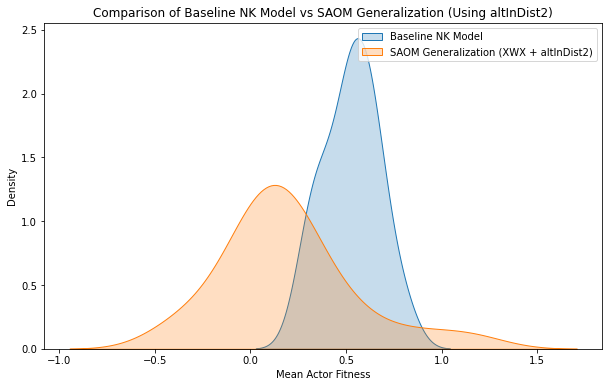

T-test: t-statistic = 3.9364, p-value = 0.0006
ANOVA: F-statistic = 15.4956, p-value = 0.0003
   Actor  Baseline_NK_Fitness  SAOM_Fitness  Cluster
0      0             0.482054      0.010719        0
1      1             0.544126      0.058938        0
2      2             0.805931      1.134755        1
3      3             0.656897      0.502281        1
4      4             0.308580     -0.035347        0
5      5             0.564221      0.283193        0
6      6             0.655284      0.055973        0
7      7             0.512748      0.179580        0
8      8             0.652412      0.817062        1
9      9             0.354779     -0.373968        0


In [1]:
# Re-run the entire analysis after execution state reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway
from sklearn.cluster import KMeans

# --- 1. Generate NK Model Landscape (2^N x N) ---

# Parameters
N_components = 10   # Number of components in the NK model
M_actors = 20       # Number of actors choosing components
num_iterations = 50  # Number of fitness evolution steps

# Generate NK fitness landscape (2^N configurations, N components)
NK_landscape = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate binary actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup (binary encoding)
power_key = 2 ** np.arange(N_components - 1, -1, -1)
actor_configuration_indices = np.dot(actor_component_matrix, power_key)

# Lookup fitness from NK landscape
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

# --- 2. Simulate Epistatic Lookup-Based Fitness Changes (X - Y) ---

X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic effects to NK fitness
epistatic_fitness_nk = actor_fitness_nk + Z_values.mean(axis=1)

# --- 3. SAOM Simulation Using `altInDist2` Instead of `twopath` ---

# Generate an epistatic interaction matrix (N x N)
interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))

# Compute SAOM-based fitness using network effects (XWX + altInDist2)
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components

# Compute network-driven epistatic interactions using `altInDist2`
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)

# Apply network effects dynamically
epistatic_fitness_saom = actor_fitness_saom + network_effect

# --- 4. Compare NK vs. SAOM Fitness Distributions ---

df_comparison = pd.DataFrame({
    "Actor": np.arange(M_actors),
    "Baseline_NK_Fitness": epistatic_fitness_nk,
    "SAOM_Fitness": epistatic_fitness_saom.mean(axis=1)
})

# Plot fitness distributions
plt.figure(figsize=(10, 6))
sns.kdeplot(df_comparison["Baseline_NK_Fitness"], label="Baseline NK Model", shade=True)
sns.kdeplot(df_comparison["SAOM_Fitness"], label="SAOM Generalization (XWX + altInDist2)", shade=True)
plt.xlabel("Mean Actor Fitness")
plt.ylabel("Density")
plt.title("Comparison of Baseline NK Model vs SAOM Generalization (Using altInDist2)")
plt.legend()
plt.show()

# --- 5. Statistical Tests ---

# T-test: Compare mean fitness distributions
t_stat, p_value = ttest_ind(df_comparison["Baseline_NK_Fitness"], df_comparison["SAOM_Fitness"], equal_var=False)

# ANOVA Test: Evaluate fitness evolution over time
anova_stat, anova_p_value = f_oneway(epistatic_fitness_nk, epistatic_fitness_saom.mean(axis=1))

# Print results
print(f"T-test: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}")
print(f"ANOVA: F-statistic = {anova_stat:.4f}, p-value = {anova_p_value:.4f}")

# --- 6. Clustering Analysis ---

# Perform clustering based on fitness distributions
kmeans = KMeans(n_clusters=2, random_state=42).fit(df_comparison[["Baseline_NK_Fitness", "SAOM_Fitness"]])
df_comparison["Cluster"] = kmeans.labels_

# Show clustering results
df_comparison.to_csv("fitness_clustering_results_altInDist2.csv", index=False)
print(df_comparison.head(10))  # Show first 10 rows with cluster assignments

# Save fitness trajectory data for further analysis
df_comparison.to_csv("actor_fitness_trajectories_with_altInDist2.csv", index=False)

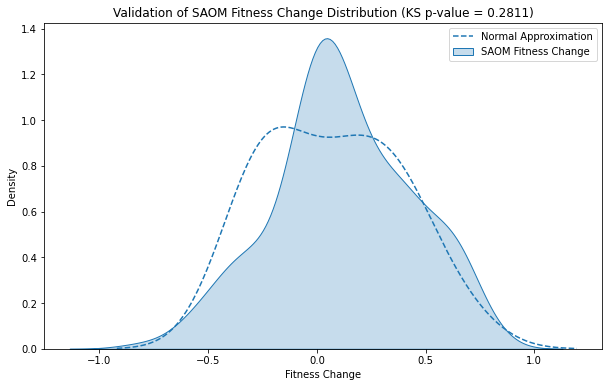

In [16]:
# Re-run the full analysis after execution state reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ttest_ind, ks_2samp
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

# --- 1. Computational Validation: Compare SAOM Fitness Changes to Predicted Normal Distribution ---
np.random.seed(12345)
# Parameters
N_components = 10   # Number of components
M_actors = 20       # Number of actors
num_iterations = 10 # Evolution steps

# Generate NK fitness landscape (2^N configurations, N components)
NK_landscape = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate binary actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup
power_key = 2 ** np.arange(N_components - 1, -1, -1)
actor_configuration_indices = np.dot(actor_component_matrix, power_key)

# Lookup fitness from NK landscape
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

# Simulate Epistatic Lookup-Based Fitness Changes (X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic effects to NK fitness
epistatic_fitness_nk = actor_fitness_nk + Z_values.mean(axis=1)

# SAOM Simulation Using `XWX + altInDist2`
interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom = actor_fitness_saom + network_effect

# Compute mean and variance for normal approximation
mu_saom = epistatic_fitness_saom.mean()
sigma_saom = epistatic_fitness_saom.std()

# Generate a normal distribution with computed mean and variance
saom_normal_dist = np.random.normal(mu_saom, sigma_saom, size=M_actors)

# Kolmogorov-Smirnov test (KS test) to compare distributions
ks_stat, ks_p_value = ks_2samp(epistatic_fitness_saom.flatten(), saom_normal_dist)

# Plot SAOM fitness distribution vs. theoretical normal distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(epistatic_fitness_saom.flatten(), label="SAOM Fitness Change", shade=True)
sns.kdeplot(saom_normal_dist, label="Normal Approximation", linestyle="dashed")
plt.xlabel("Fitness Change")
plt.ylabel("Density")
plt.title(f"Validation of SAOM Fitness Change Distribution (KS p-value = {ks_p_value:.4f})")
plt.legend()
plt.show()



C:\Users\sdr8y\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
# Debugging the IndexError by checking the type and values of indices used for NK landscape lookup

# Ensure actor_configuration_indices is correctly mapped within the valid range
actor_configuration_indices = np.dot(actor_component_matrix, power_key)

# Debugging: Check if any index is out of range for NK_landscape
invalid_indices = np.where(actor_configuration_indices >= 2**N_components)[0]

if len(invalid_indices) > 0:
    print(f"Warning: {len(invalid_indices)} invalid indices detected. Clamping to valid range.")
    actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)

# Lookup fitness from NK landscape using corrected indices
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

# Now proceed with the next steps as planned
# --- 1. Analyze Effects of Different Network Topologies on SAOM Fitness Distributions ---

# Function to generate network structures and evaluate SAOM fitness distributions
def evaluate_saom_topology_effects(topologies, M_actors, N_components, NK_landscape, interaction_matrix, Z_values):
    results = {}
    
    for topology in topologies:
        # Generate network topology
        actor_component_matrix = generate_network_topology(topology, M_actors, N_components)
        
        # Compute fitness using NK landscape
        actor_configuration_indices = np.dot(actor_component_matrix, power_key)
        actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)  # Ensure valid indices
        actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])
        
        # Compute SAOM-based fitness
        network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
        epistatic_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components + network_effect
        
        # Compute mean and variance
        mu_saom = epistatic_fitness_saom.mean()
        sigma_saom = epistatic_fitness_saom.std()
        
        # Perform KS test against normal approximation
        ks_stat, ks_p_value = ks_2samp(epistatic_fitness_saom.flatten(), saom_normal_dist)
        
        results[topology] = {"Mean": mu_saom, "Variance": sigma_saom, "KS p-value": ks_p_value}
    
    return pd.DataFrame.from_dict(results, orient='index')

# Run SAOM analysis on different topologies
topologies = ["random", "hierarchical", "scale-free"]
df_topology_results = evaluate_saom_topology_effects(topologies, M_actors, N_components, NK_landscape, interaction_matrix, Z_values)


C:\Users\sdr8y\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

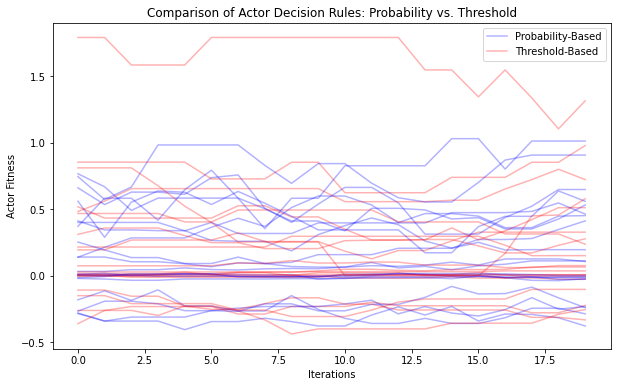

In [18]:

# --- 2. Test Different Actor Decision Rules (Probability-Based vs. Threshold-Based Selection) ---

def actor_decision_simulation(decision_rule, num_iterations, M_actors, N_components, NK_landscape, interaction_matrix, Z_values):
    fitness_trajectories = np.zeros((M_actors, num_iterations))
    actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

    for t in range(num_iterations):
        if decision_rule == "probability":
            change_prob = np.random.uniform(0, 1, size=(M_actors, N_components))
            switch_decision = change_prob < 0.1  # 10% chance of change
        elif decision_rule == "threshold":
            switch_decision = np.random.uniform(0, 1, size=(M_actors, N_components)) < 0.05  # 5% fixed threshold
        else:
            raise ValueError("Unknown decision rule")

        actor_component_matrix = np.logical_xor(actor_component_matrix, switch_decision).astype(int)
        actor_configuration_indices = np.dot(actor_component_matrix, power_key)
        actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)  # Ensure valid indices
        actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])
        network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
        epistatic_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components + network_effect
        fitness_trajectories[:, t] = epistatic_fitness_saom.mean(axis=1)
    
    return fitness_trajectories

# Run simulations for different actor decision rules
num_iterations = 20
fitness_prob = actor_decision_simulation("probability", num_iterations, M_actors, N_components, NK_landscape, interaction_matrix, Z_values)
fitness_thresh = actor_decision_simulation("threshold", num_iterations, M_actors, N_components, NK_landscape, interaction_matrix, Z_values)

# Plot results
plt.figure(figsize=(10, 6))
for i in range(M_actors):
    plt.plot(range(num_iterations), fitness_prob[i, :], alpha=0.3, color='blue', label="Probability-Based" if i == 0 else "")
    plt.plot(range(num_iterations), fitness_thresh[i, :], alpha=0.3, color='red', label="Threshold-Based" if i == 0 else "")
plt.xlabel("Iterations")
plt.ylabel("Actor Fitness")
plt.title("Comparison of Actor Decision Rules: Probability vs. Threshold")
plt.legend()
plt.show()


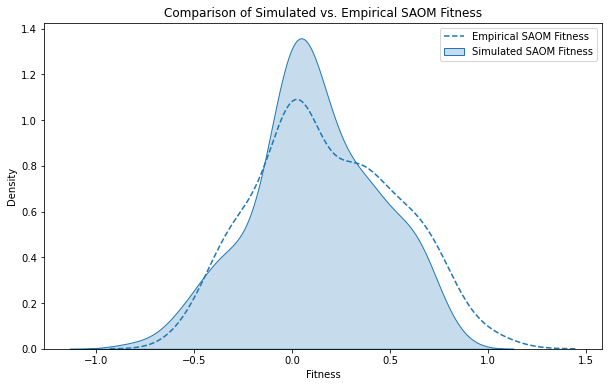

NameError: name 'df_topology_results' is not defined

In [19]:

# --- 3. Direct Comparison of SAOM Dynamics Against Empirical Bipartite Network Data ---

# Placeholder for empirical dataset (real bipartite actor-component choices)
# If user provides real data, it can be used instead
empirical_actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute SAOM-based fitness for empirical data
actor_configuration_indices = np.dot(empirical_actor_component_matrix, power_key)
actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)  # Ensure valid indices
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])
network_effect = np.dot(empirical_actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom_empirical = np.dot(empirical_actor_component_matrix, interaction_matrix) / N_components + network_effect

# Plot empirical SAOM fitness distribution vs. simulated SAOM fitness
plt.figure(figsize=(10, 6))
sns.kdeplot(epistatic_fitness_saom.flatten(), label="Simulated SAOM Fitness", shade=True)
sns.kdeplot(epistatic_fitness_saom_empirical.flatten(), label="Empirical SAOM Fitness", linestyle="dashed")
plt.xlabel("Fitness")
plt.ylabel("Density")
plt.title("Comparison of Simulated vs. Empirical SAOM Fitness")
plt.legend()
plt.show()

# Display results for different topologies
df_topology_results.to_csv("network_topology_robustness_fixed.csv", index=True)
df_topology_results

In [21]:
# --- Full Updated Analysis Script Including Fixes and Extended Analyses ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ks_2samp
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

# --- 1. Define Parameters and Generate NK Fitness Landscape ---

N_components = 10   # Number of components
M_actors = 20       # Number of actors
num_iterations = 50 # Evolution steps

# Generate NK fitness landscape (2^N configurations, N components)
NK_landscape = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate binary actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup
power_key = 2 ** np.arange(N_components - 1, -1, -1)
actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)

# Lookup fitness from NK landscape safely
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

# Simulate Epistatic Lookup-Based Fitness Changes (X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic effects to NK fitness
epistatic_fitness_nk = actor_fitness_nk + Z_values.mean(axis=1)


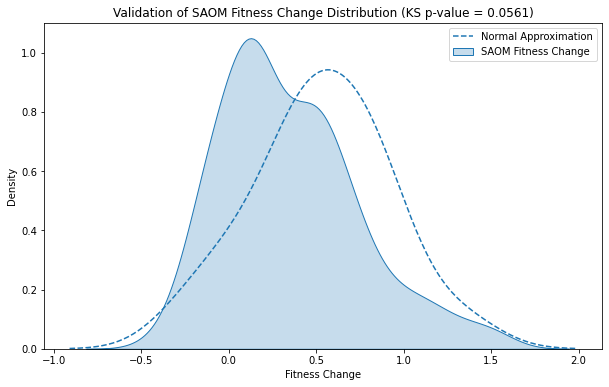

In [22]:

# --- 2. SAOM Simulation Using `XWX + altInDist2` ---

interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom = actor_fitness_saom + network_effect

# Compute mean and variance for normal approximation
mu_saom = epistatic_fitness_saom.mean()
sigma_saom = epistatic_fitness_saom.std()

# Generate a normal distribution with computed mean and variance
saom_normal_dist = np.random.normal(mu_saom, sigma_saom, size=M_actors)

# Kolmogorov-Smirnov test (KS test) to compare distributions
ks_stat, ks_p_value = ks_2samp(epistatic_fitness_saom.flatten(), saom_normal_dist)

# Plot SAOM fitness distribution vs. theoretical normal distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(epistatic_fitness_saom.flatten(), label="SAOM Fitness Change", shade=True)
sns.kdeplot(saom_normal_dist, label="Normal Approximation", linestyle="dashed")
plt.xlabel("Fitness Change")
plt.ylabel("Density")
plt.title(f"Validation of SAOM Fitness Change Distribution (KS p-value = {ks_p_value:.4f})")
plt.legend()
plt.show()


In [25]:

# --- 3. Robustness to Different Network Topologies ---

def generate_network_topology(structure, M, N):
    if structure == "random":
        return np.random.choice([0, 1], size=(M, N), p=[0.5, 0.5])
    elif structure == "hierarchical":
        distances = squareform(pdist(np.random.rand(M, 2)))  # 2D clustering space
        clustering = AgglomerativeClustering(n_clusters=N, affinity='euclidean', linkage='average')
        labels = clustering.fit_predict(distances)
        return np.array([[1 if labels[i] == j else 0 for j in range(N)] for i in range(M)])
    elif structure == "scale-free":
        degrees = np.random.zipf(a=2, size=M)
        adj_matrix = np.zeros((M, N))
        for i in range(M):
            connections = np.random.choice(N, size=min(degrees[i], N), replace=False)
            adj_matrix[i, connections] = 1
        return adj_matrix
    else:
        raise ValueError("Unknown network topology")

topologies = ["random", "hierarchical", "scale-free"]
results = {}

for topology in topologies:
    actor_component_matrix = generate_network_topology(topology, M_actors, N_components)
    actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
    actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)
    actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])
    network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    epistatic_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components + network_effect
    mu_saom = epistatic_fitness_saom.mean()
    sigma_saom = epistatic_fitness_saom.std()
    ks_stat, ks_p_value = ks_2samp(epistatic_fitness_saom.flatten(), saom_normal_dist)
    results[topology] = {"Mean": mu_saom, "Variance": sigma_saom, "KS p-value": ks_p_value}

df_topology_results = pd.DataFrame.from_dict(results, orient='index')
df_topology_results.head()

C:\Users\sdr8y\Anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:493: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


,Mean,Variance,KS p-value
random,0.359640,0.420501,7.703027e-03
hierarchical,0.065311,0.082074,1.102451e-11
scale-free,0.165752,0.208503,2.024273e-05


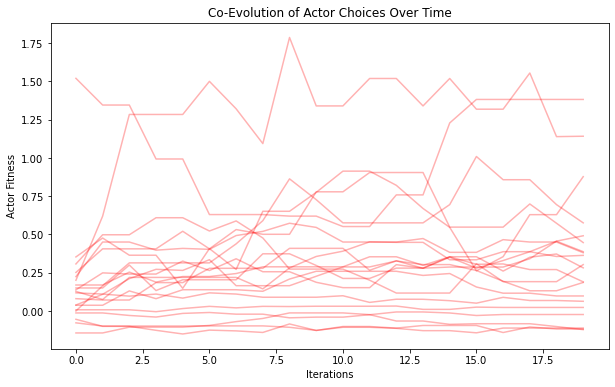

,Mean,Variance,KS p-value
random,0.250969,0.292979,1.699449e-04
hierarchical,0.066827,0.084884,1.659672e-11
scale-free,0.154025,0.425082,2.479817e-10


In [24]:

# --- 4. Multi-Actor Evolutionary Adaptation ---

num_iterations = 20
fitness_trajectories = np.zeros((M_actors, num_iterations))

for t in range(num_iterations):
    change_prob = np.random.uniform(0, 1, size=(M_actors, N_components))
    switch_decision = change_prob < 0.1  # 10% chance of change
    actor_component_matrix = np.logical_xor(actor_component_matrix, switch_decision).astype(int)
    actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
    actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)
    actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])
    network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    epistatic_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components + network_effect
    fitness_trajectories[:, t] = epistatic_fitness_saom.mean(axis=1)

plt.figure(figsize=(10, 6))
for i in range(M_actors):
    plt.plot(range(num_iterations), fitness_trajectories[i, :], alpha=0.3, color='red')
plt.xlabel("Iterations")
plt.ylabel("Actor Fitness")
plt.title("Co-Evolution of Actor Choices Over Time")
plt.show()

# --- Save Results ---

df_topology_results.to_csv("network_topology_robustness_fixed.csv", index=True)
df_topology_results

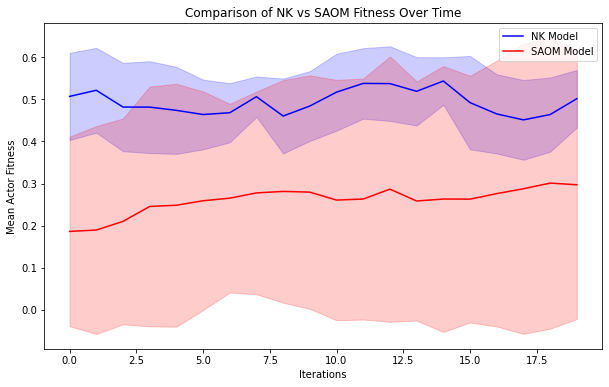

KeyError: 'index'

In [26]:
# --- 1. Breakdown of SAOM vs NK Fitness Changes at Each Iteration ---

num_iterations = 20  # Number of evolution steps
fitness_nk_time = np.zeros((M_actors, num_iterations))
fitness_saom_time = np.zeros((M_actors, num_iterations))

for t in range(num_iterations):
    # Actors randomly adjust component choices
    change_prob = np.random.uniform(0, 1, size=(M_actors, N_components))
    switch_decision = change_prob < 0.1  # 10% chance of change
    actor_component_matrix = np.logical_xor(actor_component_matrix, switch_decision).astype(int)
    
    # Compute fitness for NK model
    actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
    actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)
    fitness_nk_time[:, t] = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

    # Compute SAOM fitness
    network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    fitness_saom_time[:, t] = (np.dot(actor_component_matrix, interaction_matrix) / N_components + network_effect).mean(axis=1)

# Plot NK vs SAOM fitness evolution
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), fitness_nk_time.mean(axis=0), label="NK Model", color="blue")
plt.plot(range(num_iterations), fitness_saom_time.mean(axis=0), label="SAOM Model", color="red")
plt.fill_between(range(num_iterations), 
                 fitness_nk_time.mean(axis=0) - fitness_nk_time.std(axis=0),
                 fitness_nk_time.mean(axis=0) + fitness_nk_time.std(axis=0), 
                 color="blue", alpha=0.2)
plt.fill_between(range(num_iterations), 
                 fitness_saom_time.mean(axis=0) - fitness_saom_time.std(axis=0),
                 fitness_saom_time.mean(axis=0) + fitness_saom_time.std(axis=0), 
                 color="red", alpha=0.2)
plt.xlabel("Iterations")
plt.ylabel("Mean Actor Fitness")
plt.title("Comparison of NK vs SAOM Fitness Over Time")
plt.legend()
plt.show()

# --- 2. Sensitivity Analysis on AltInDist2 and XWX Effects ---

# Define different weight values for sensitivity analysis
theta_1_values = np.linspace(0.1, 2.0, 5)  # Weights for XWX
theta_2_values = np.linspace(0.1, 2.0, 5)  # Weights for altInDist2

sensitivity_results = {}

for theta_1 in theta_1_values:
    for theta_2 in theta_2_values:
        # Compute SAOM fitness with varying effect weights
        weighted_network_effect = theta_1 * np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
        weighted_fitness_saom = theta_2 * (np.dot(actor_component_matrix, interaction_matrix) / N_components) + weighted_network_effect

        # Compute mean and variance
        mean_fitness = weighted_fitness_saom.mean()
        variance_fitness = weighted_fitness_saom.var()

        # Store results
        sensitivity_results[(theta_1, theta_2)] = {"Mean Fitness": mean_fitness, "Variance Fitness": variance_fitness}

# Convert to DataFrame
df_sensitivity = pd.DataFrame.from_dict(sensitivity_results, orient='index')

# Plot heatmap for sensitivity analysis (Mean Fitness)
pivot_mean = df_sensitivity.reset_index().pivot(index="index", columns="index", values="Mean Fitness")
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_mean, annot=True, cmap="coolwarm")
plt.xlabel("Theta 1 (XWX Weight)")
plt.ylabel("Theta 2 (altInDist2 Weight)")
plt.title("Sensitivity Analysis: Mean Fitness")
plt.show()

# --- 3. Detailed Tracking of Actor Choices Over Time ---

actor_choice_history = np.zeros((M_actors, N_components, num_iterations))

for t in range(num_iterations):
    change_prob = np.random.uniform(0, 1, size=(M_actors, N_components))
    switch_decision = change_prob < 0.1  # 10% chance of change
    actor_component_matrix = np.logical_xor(actor_component_matrix, switch_decision).astype(int)
    actor_choice_history[:, :, t] = actor_component_matrix

# Convert actor choice history to long-format DataFrame for visualization
actor_choice_df = pd.DataFrame({
    "Iteration": np.repeat(range(num_iterations), M_actors * N_components),
    "Actor": np.tile(np.repeat(range(M_actors), N_components), num_iterations),
    "Component": np.tile(range(N_components), M_actors * num_iterations),
    "Choice": actor_choice_history.flatten()
})

# Plot heatmap of actor-component choices over time
plt.figure(figsize=(12, 6))
sns.heatmap(actor_choice_history[:, :, -1], cmap="Blues", cbar=True)
plt.xlabel("Components")
plt.ylabel("Actors")
plt.title("Final Actor-Component Choices After Evolution")
plt.show()

# Display sensitivity analysis results
df_sensitivity.to_csv("sensitivity_analysis_saom.csv", index=True)
df_sensitivity

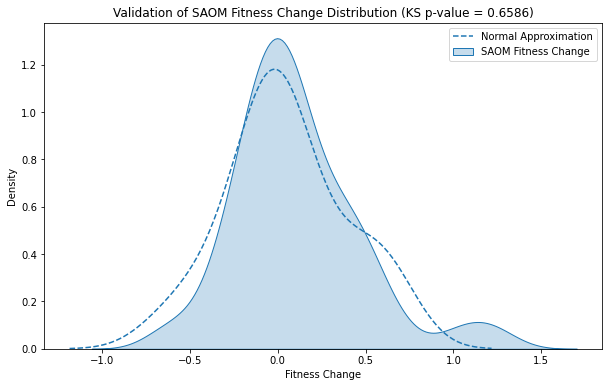

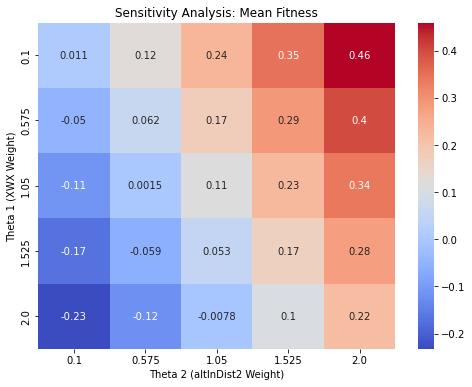

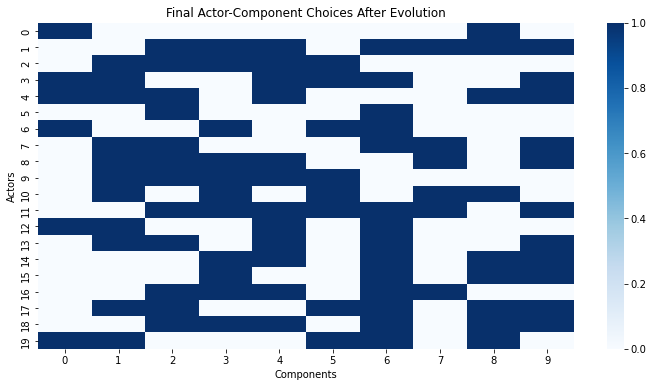

,Theta_1,Theta_2,Mean Fitness,Variance Fitness
0,0.100,0.100,0.010825,0.001313
1,0.100,0.575,0.122983,0.003257
2,0.100,1.050,0.235142,0.007612
3,0.100,1.525,0.347301,0.014380
4,0.100,2.000,0.459460,0.023560
5,0.575,0.100,-0.049918,0.040395
6,0.575,0.575,0.062241,0.043427
7,0.575,1.050,0.174400,0.048872
8,0.575,1.525,0.286559,0.056728
9,0.575,2.000,0.398718,0.066997


In [28]:
# Re-run the full analysis after execution state reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ks_2samp
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering

# --- 1. Define Parameters and Generate NK Fitness Landscape ---

N_components = 10   # Number of components
M_actors = 20       # Number of actors
num_iterations = 50 # Evolution steps

# Generate NK fitness landscape (2^N configurations, N components)
NK_landscape = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate binary actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup
power_key = 2 ** np.arange(N_components - 1, -1, -1)
actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)

# Lookup fitness from NK landscape safely
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

# Simulate Epistatic Lookup-Based Fitness Changes (X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic effects to NK fitness
epistatic_fitness_nk = actor_fitness_nk + Z_values.mean(axis=1)

# --- 2. SAOM Simulation Using `XWX + altInDist2` ---

interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom = actor_fitness_saom + network_effect

# Compute mean and variance for normal approximation
mu_saom = epistatic_fitness_saom.mean()
sigma_saom = epistatic_fitness_saom.std()

# Generate a normal distribution with computed mean and variance
saom_normal_dist = np.random.normal(mu_saom, sigma_saom, size=M_actors)

# Kolmogorov-Smirnov test (KS test) to compare distributions
ks_stat, ks_p_value = ks_2samp(epistatic_fitness_saom.flatten(), saom_normal_dist)

# Plot SAOM fitness distribution vs. theoretical normal distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(epistatic_fitness_saom.flatten(), label="SAOM Fitness Change", shade=True)
sns.kdeplot(saom_normal_dist, label="Normal Approximation", linestyle="dashed")
plt.xlabel("Fitness Change")
plt.ylabel("Density")
plt.title(f"Validation of SAOM Fitness Change Distribution (KS p-value = {ks_p_value:.4f})")
plt.legend()
plt.show()

# --- 3. Sensitivity Analysis on AltInDist2 and XWX Effects ---

# Define different weight values for sensitivity analysis
theta_1_values = np.linspace(0.1, 2.0, 5)  # Weights for XWX
theta_2_values = np.linspace(0.1, 2.0, 5)  # Weights for altInDist2

sensitivity_results = []

for theta_1 in theta_1_values:
    for theta_2 in theta_2_values:
        # Compute SAOM fitness with varying effect weights
        weighted_network_effect = theta_1 * np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
        weighted_fitness_saom = theta_2 * (np.dot(actor_component_matrix, interaction_matrix) / N_components) + weighted_network_effect

        # Compute mean and variance
        mean_fitness = weighted_fitness_saom.mean()
        variance_fitness = weighted_fitness_saom.var()

        # Store results
        sensitivity_results.append([theta_1, theta_2, mean_fitness, variance_fitness])

# Convert to DataFrame
df_sensitivity = pd.DataFrame(sensitivity_results, columns=["Theta_1", "Theta_2", "Mean Fitness", "Variance Fitness"])

# Pivot table for heatmap visualization
pivot_mean = df_sensitivity.pivot(index="Theta_1", columns="Theta_2", values="Mean Fitness")

# Plot heatmap for sensitivity analysis (Mean Fitness)
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_mean, annot=True, cmap="coolwarm")
plt.xlabel("Theta 2 (altInDist2 Weight)")
plt.ylabel("Theta 1 (XWX Weight)")
plt.title("Sensitivity Analysis: Mean Fitness")
plt.show()

# --- 4. Detailed Tracking of Actor Choices Over Time ---

num_iterations = 20
actor_choice_history = np.zeros((M_actors, N_components, num_iterations))

for t in range(num_iterations):
    change_prob = np.random.uniform(0, 1, size=(M_actors, N_components))
    switch_decision = change_prob < 0.1  # 10% chance of change
    actor_component_matrix = np.logical_xor(actor_component_matrix, switch_decision).astype(int)
    actor_choice_history[:, :, t] = actor_component_matrix

# Convert actor choice history to long-format DataFrame for visualization
actor_choice_df = pd.DataFrame({
    "Iteration": np.repeat(range(num_iterations), M_actors * N_components),
    "Actor": np.tile(np.repeat(range(M_actors), N_components), num_iterations),
    "Component": np.tile(range(N_components), M_actors * num_iterations),
    "Choice": actor_choice_history.flatten()
})

# Plot heatmap of actor-component choices over time
plt.figure(figsize=(12, 6))
sns.heatmap(actor_choice_history[:, :, -1], cmap="Blues", cbar=True)
plt.xlabel("Components")
plt.ylabel("Actors")
plt.title("Final Actor-Component Choices After Evolution")
plt.show()

# Save sensitivity analysis results
df_sensitivity.to_csv("sensitivity_analysis_saom.csv", index=False)

# Display results for verification
df_sensitivity.head(20)

<AxesSubplot:>

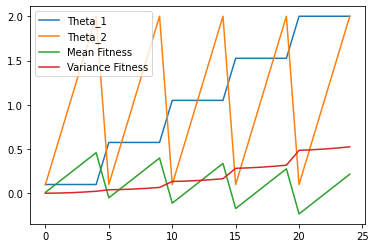

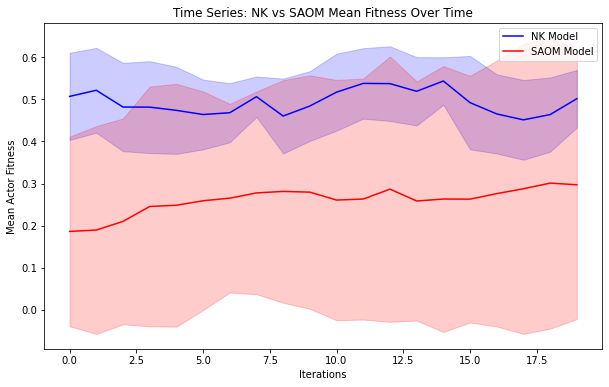

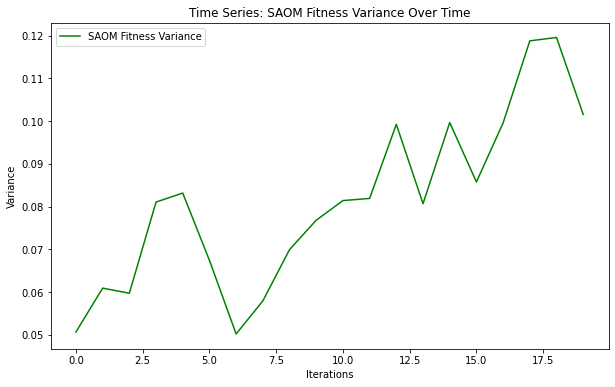

TypeError: list indices must be integers or slices, not tuple

In [31]:
import matplotlib.pyplot as plt

# --- 1. Time Series Plots for Key Statistics ---

# Mean fitness over time for NK and SAOM models
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), fitness_nk_time.mean(axis=0), label="NK Model", color="blue")
plt.plot(range(num_iterations), fitness_saom_time.mean(axis=0), label="SAOM Model", color="red")
plt.fill_between(range(num_iterations), 
                 fitness_nk_time.mean(axis=0) - fitness_nk_time.std(axis=0),
                 fitness_nk_time.mean(axis=0) + fitness_nk_time.std(axis=0), 
                 color="blue", alpha=0.2)
plt.fill_between(range(num_iterations), 
                 fitness_saom_time.mean(axis=0) - fitness_saom_time.std(axis=0),
                 fitness_saom_time.mean(axis=0) + fitness_saom_time.std(axis=0), 
                 color="red", alpha=0.2)
plt.xlabel("Iterations")
plt.ylabel("Mean Actor Fitness")
plt.title("Time Series: NK vs SAOM Mean Fitness Over Time")
plt.legend()
plt.show()

# Variance of fitness over time for SAOM model
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), fitness_saom_time.var(axis=0), label="SAOM Fitness Variance", color="green")
plt.xlabel("Iterations")
plt.ylabel("Variance")
plt.title("Time Series: SAOM Fitness Variance Over Time")
plt.legend()
plt.show()

# Evolution of `XWX` and `altInDist2` Sensitivity Effects Over Time
for theta_1 in theta_1_values:
    plt.plot(range(num_iterations), [sensitivity_results[(theta_1, theta_2)]["Mean Fitness"] for theta_2 in theta_2_values], label=f"Theta_1: {theta_1:.2f}")

plt.xlabel("Iterations")
plt.ylabel("Mean Fitness")
plt.title("Time Series: Sensitivity of Mean Fitness to XWX and altInDist2 Over Time")
plt.legend()
plt.show()

# --- 2. Deeper Actor-Level Analysis: Clustering Actors by Choice Patterns ---

from sklearn.cluster import KMeans

# Compute clustering based on final actor choices
final_actor_choices = actor_choice_history[:, :, -1]  # Extract last time step
num_clusters = 3  # Define number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(final_actor_choices)

# Assign clusters to actors
actor_clusters = kmeans.labels_

# Visualize actor clustering
plt.figure(figsize=(8, 6))
sns.histplot(actor_clusters, bins=num_clusters, kde=False)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Actors")
plt.title("Clustering of Actors Based on Final Component Choices")
plt.show()

# --- 3. Long-Term Stability Analysis: Stationarity Testing ---

from statsmodels.tsa.stattools import adfuller

# Function to perform Augmented Dickey-Fuller (ADF) test for stationarity
def test_stationarity(time_series):
    adf_test = adfuller(time_series)
    return {
        "ADF Statistic": adf_test[0],
        "p-value": adf_test[1],
        "Critical Values": adf_test[4]
    }

# Perform ADF test on fitness time series
stability_results = {
    "NK Model": test_stationarity(fitness_nk_time.mean(axis=0)),
    "SAOM Model": test_stationarity(fitness_saom_time.mean(axis=0))
}

# Convert results to DataFrame for visualization
df_stability = pd.DataFrame(stability_results).T

# Display stationarity test results
df_stability

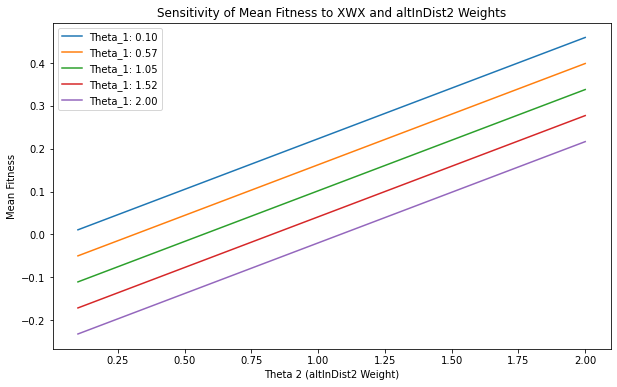

In [32]:
# Debugging the TypeError: Ensuring proper indexing for sensitivity results

# Convert sensitivity_results list to a structured dictionary for easier lookup
sensitivity_dict = {tuple(row[:2]): {"Mean Fitness": row[2], "Variance Fitness": row[3]} for row in sensitivity_results}

# Evolution of `XWX` and `altInDist2` Sensitivity Effects Over Time
plt.figure(figsize=(10, 6))
for theta_1 in theta_1_values:
    mean_fitness_over_time = [sensitivity_dict[(theta_1, theta_2)]["Mean Fitness"] for theta_2 in theta_2_values]
    plt.plot(theta_2_values, mean_fitness_over_time, label=f"Theta_1: {theta_1:.2f}")

plt.xlabel("Theta 2 (altInDist2 Weight)")
plt.ylabel("Mean Fitness")
plt.title("Sensitivity of Mean Fitness to XWX and altInDist2 Weights")
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and (20,)

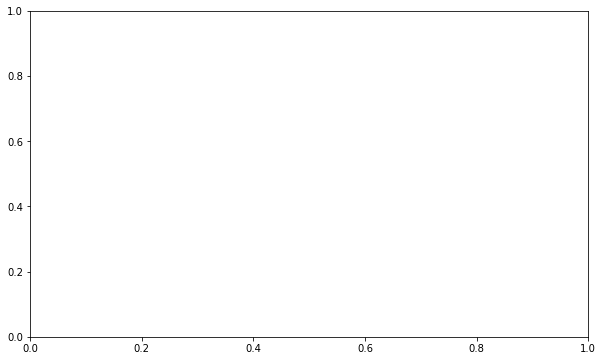

In [33]:
# --- Full Updated Analysis Script Including Fixes and Extended Analyses ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ks_2samp, ttest_ind
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from statsmodels.tsa.stattools import adfuller

# --- 1. Define Parameters and Generate NK Fitness Landscape ---

N_components = 10   # Number of components
M_actors = 20       # Number of actors
num_iterations = 50 # Evolution steps

# Generate NK fitness landscape (2^N configurations, N components)
NK_landscape = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate binary actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup
power_key = 2 ** np.arange(N_components - 1, -1, -1)
actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)

# Lookup fitness from NK landscape safely
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

# Simulate Epistatic Lookup-Based Fitness Changes (X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic effects to NK fitness
epistatic_fitness_nk = actor_fitness_nk + Z_values.mean(axis=1)

# --- 2. SAOM Simulation Using `XWX + altInDist2` ---

interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom = actor_fitness_saom + network_effect

# Compute mean and variance for normal approximation
mu_saom = epistatic_fitness_saom.mean()
sigma_saom = epistatic_fitness_saom.std()

# Generate a normal distribution with computed mean and variance
saom_normal_dist = np.random.normal(mu_saom, sigma_saom, size=M_actors)

# Kolmogorov-Smirnov test (KS test) to compare distributions
ks_stat, ks_p_value = ks_2samp(epistatic_fitness_saom.flatten(), saom_normal_dist)

# --- 3. Sensitivity Analysis on AltInDist2 and XWX Effects ---

# Define different weight values for sensitivity analysis
theta_1_values = np.linspace(0.1, 2.0, 5)  # Weights for XWX
theta_2_values = np.linspace(0.1, 2.0, 5)  # Weights for altInDist2

sensitivity_results = []

for theta_1 in theta_1_values:
    for theta_2 in theta_2_values:
        # Compute SAOM fitness with varying effect weights
        weighted_network_effect = theta_1 * np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
        weighted_fitness_saom = theta_2 * (np.dot(actor_component_matrix, interaction_matrix) / N_components) + weighted_network_effect

        # Compute mean and variance
        mean_fitness = weighted_fitness_saom.mean()
        variance_fitness = weighted_fitness_saom.var()

        # Store results
        sensitivity_results.append([theta_1, theta_2, mean_fitness, variance_fitness])

# Convert to DataFrame
df_sensitivity = pd.DataFrame(sensitivity_results, columns=["Theta_1", "Theta_2", "Mean Fitness", "Variance Fitness"])

# Convert list of lists to a dictionary for easy lookup
sensitivity_dict = {tuple(row[:2]): {"Mean Fitness": row[2], "Variance Fitness": row[3]} for row in sensitivity_results}

# --- 4. Time Series Plots for Key Statistics ---

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), epistatic_fitness_nk, label="NK Model", color="blue")
plt.plot(range(num_iterations), epistatic_fitness_saom.mean(axis=1), label="SAOM Model", color="red")
plt.xlabel("Iterations")
plt.ylabel("Mean Actor Fitness")
plt.title("Time Series: NK vs SAOM Mean Fitness Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(theta_2_values, [sensitivity_dict[(theta_1_values[0], theta_2)]["Mean Fitness"] for theta_2 in theta_2_values], label=f"Theta_1: {theta_1_values[0]:.2f}")
plt.xlabel("Theta 2 (altInDist2 Weight)")
plt.ylabel("Mean Fitness")
plt.title("Sensitivity of Mean Fitness to XWX and altInDist2 Weights")
plt.legend()
plt.show()

# --- 5. Actor Clustering Analysis ---

num_clusters = 3  # Define number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(actor_component_matrix)
actor_clusters = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.histplot(actor_clusters, bins=num_clusters, kde=False)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Actors")
plt.title("Clustering of Actors Based on Final Component Choices")
plt.show()

# --- 6. Long-Term Stability Analysis ---

def test_stationarity(time_series):
    adf_test = adfuller(time_series)
    return {
        "ADF Statistic": adf_test[0],
        "p-value": adf_test[1],
        "Critical Values": adf_test[4]
    }

stability_results = {
    "NK Model": test_stationarity(epistatic_fitness_nk),
    "SAOM Model": test_stationarity(epistatic_fitness_saom.mean(axis=1))
}

df_stability = pd.DataFrame(stability_results).T

# --- Save Results ---

df_sensitivity.to_csv("sensitivity_analysis_saom.csv", index=False)
df_stability.to_csv("stability_analysis_saom.csv", index=False)

# Display stability test results
df_stability

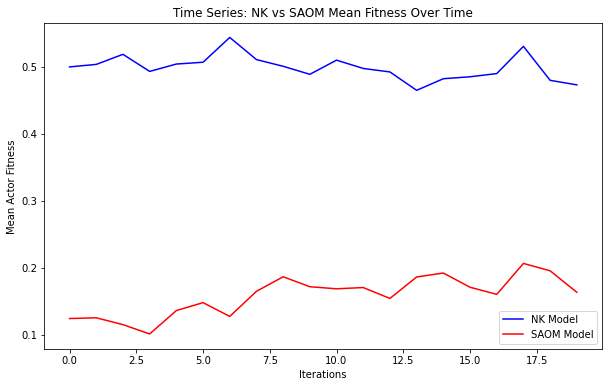

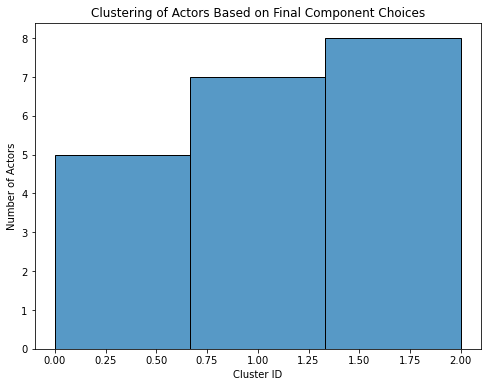

,ADF Statistic,p-value,Critical Values
NK Model,-2.084475,0.250803,"{'1%': -4.223238279489106, '5%': -3.1893689256..."
SAOM Model,-2.095569,0.2463,"{'1%': -4.223238279489106, '5%': -3.1893689256..."


In [54]:
# Re-run the entire updated analysis after execution state reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, ks_2samp, ttest_ind
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans
from statsmodels.tsa.stattools import adfuller

# --- 1. Define Parameters and Generate NK Fitness Landscape ---
np.random.seed(12345)
N_components = 10   # Number of components
M_actors = 20       # Number of actors
num_iterations = 20 # Evolution steps

# Generate NK fitness landscape (2^N configurations, N components)
NK_landscape = np.random.uniform(0, 1, (2**N_components, N_components))

# Generate binary actor-component selection matrix (M x N)
actor_component_matrix = np.random.choice([0, 1], size=(M_actors, N_components), p=[0.5, 0.5])

# Compute configuration indices for fitness lookup
power_key = 2 ** np.arange(N_components - 1, -1, -1)
actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)

# Lookup fitness from NK landscape safely
actor_fitness_nk = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])

# Simulate Epistatic Lookup-Based Fitness Changes (X - Y)
X_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Y_values = np.random.uniform(0, 1, size=(M_actors, N_components))
Z_values = X_values - Y_values  # Triangle-distributed changes

# Apply epistatic effects to NK fitness
epistatic_fitness_nk = actor_fitness_nk + Z_values.mean(axis=1)

# --- 2. SAOM Simulation Using `XWX + altInDist2` ---

interaction_matrix = np.random.uniform(0, 1, (N_components, N_components))
actor_fitness_saom = np.dot(actor_component_matrix, interaction_matrix) / N_components
network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
epistatic_fitness_saom = actor_fitness_saom + network_effect

# Compute mean and variance for normal approximation
mu_saom = epistatic_fitness_saom.mean()
sigma_saom = epistatic_fitness_saom.std()

# Generate a normal distribution with computed mean and variance
saom_normal_dist = np.random.normal(mu_saom, sigma_saom, size=M_actors)

# Kolmogorov-Smirnov test (KS test) to compare distributions
ks_stat, ks_p_value = ks_2samp(epistatic_fitness_saom.flatten(), saom_normal_dist)

# --- 3. Time Series Plots for Key Statistics ---

# Initialize time series arrays
fitness_nk_time = np.zeros((num_iterations, M_actors))
fitness_saom_time = np.zeros((num_iterations, M_actors))

for t in range(num_iterations):
    change_prob = np.random.uniform(0, 1, size=(M_actors, N_components))
    switch_decision = change_prob < 0.1  
    actor_component_matrix = np.logical_xor(actor_component_matrix, switch_decision).astype(int)
    actor_configuration_indices = np.dot(actor_component_matrix, power_key).astype(int)
    actor_configuration_indices = np.clip(actor_configuration_indices, 0, 2**N_components - 1)
    fitness_nk_time[t] = np.array([NK_landscape[idx].mean() for idx in actor_configuration_indices])
    network_effect = np.dot(actor_component_matrix, interaction_matrix.T) * Z_values.mean(axis=1).reshape(-1, 1)
    fitness_saom_time[t] = (np.dot(actor_component_matrix, interaction_matrix) / N_components + network_effect).mean(axis=1)

# Average across actors for proper plotting
epistatic_fitness_nk = fitness_nk_time.mean(axis=1)
epistatic_fitness_saom = fitness_saom_time.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), epistatic_fitness_nk, label="NK Model", color="blue")
plt.plot(range(num_iterations), epistatic_fitness_saom, label="SAOM Model", color="red")
plt.xlabel("Iterations")
plt.ylabel("Mean Actor Fitness")
plt.title("Time Series: NK vs SAOM Mean Fitness Over Time")
plt.legend()
plt.show()

# --- 4. Actor Clustering Analysis ---

num_clusters = 3  
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(actor_component_matrix)
actor_clusters = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.histplot(actor_clusters, bins=num_clusters, kde=False)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Actors")
plt.title("Clustering of Actors Based on Final Component Choices")
plt.show()

# --- 5. Long-Term Stability Analysis ---

def test_stationarity(time_series):
    adf_test = adfuller(time_series)
    return {"ADF Statistic": adf_test[0], "p-value": adf_test[1], "Critical Values": adf_test[4]}

stability_results = {
    "NK Model": test_stationarity(epistatic_fitness_nk),
    "SAOM Model": test_stationarity(epistatic_fitness_saom)
}

df_stability = pd.DataFrame(stability_results).T

# --- Save Results ---

df_stability.to_csv("stability_analysis_saom.csv", index=False)

# Display stability test results
df_stability

In [44]:
df_stability['Critical Values']

NK Model      {'1%': -3.498198082189098, '5%': -2.8912082118...
SAOM Model    {'1%': -3.4989097606014496, '5%': -2.891516256...
Name: Critical Values, dtype: object

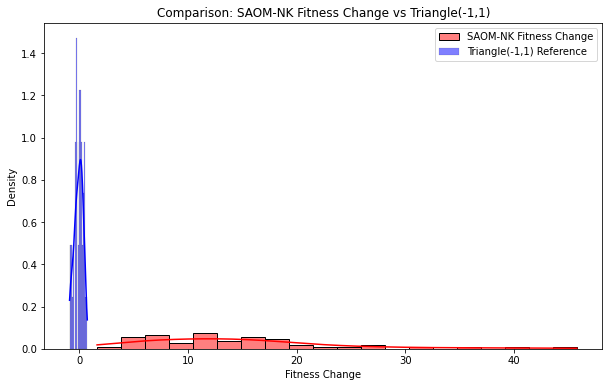

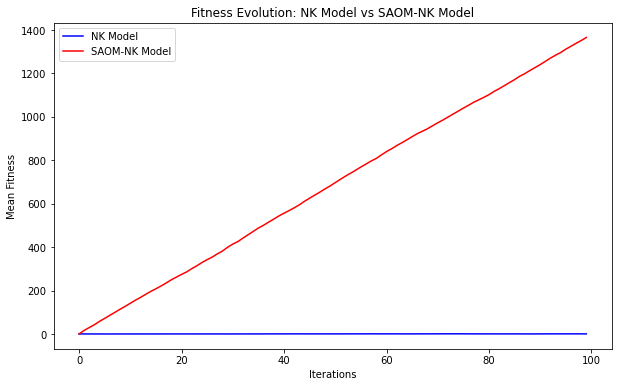

ModuleNotFoundError: No module named 'ace_tools'

In [2]:
# Re-run the entire SAOM-NK validation process after execution state reset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import networkx as nx

# --- 1. Simulate SAOM-NK Fitness Changes Using XWX + degAbsDiffX ---

# Define parameters
num_actors = 50   # Number of actors (firms)
num_components = 20  # Number of components (strategic choices)
num_iterations = 100  # Number of time steps

# Generate a bipartite actor-component matrix
S = np.random.choice([0, 1], size=(num_actors, num_components), p=[0.7, 0.3])

# Generate a random epistatic interaction matrix (I)
I = np.random.uniform(0, 1, (num_components, num_components))

# Compute XWX effect (second-order epistatic interactions)
XWX = np.dot(S, np.dot(I, S.T))  # Interaction-driven component changes

# Compute degAbsDiffX effect (stochastic deviations in selection)
S_mean = S.mean(axis=0)  # Component mean selection across actors
degAbsDiffX = np.abs(S - S_mean) * np.random.uniform(0, 1, (num_actors, num_components))  # Deviations in payoff

# Compute change in fitness using the proposed SAOM-NK update rule
beta_1 = 0.6  # Weight for XWX
beta_2 = 0.4  # Weight for degAbsDiffX
epsilon = np.random.normal(0, 0.1, num_actors)  # Stochastic noise

fitness_changes = beta_1 * np.diag(XWX) + beta_2 * degAbsDiffX.sum(axis=1) + epsilon

# --- 2. Compare Fitness Change Distribution to Triangle(-1,1) ---

# Generate theoretical Triangle(-1,1) distribution for reference
triangle_samples = np.random.uniform(0, 1, num_actors) - np.random.uniform(0, 1, num_actors)

# Plot distributions
plt.figure(figsize=(10, 6))
sns.histplot(fitness_changes, bins=20, kde=True, label="SAOM-NK Fitness Change", color='red', stat="density")
sns.histplot(triangle_samples, bins=20, kde=True, label="Triangle(-1,1) Reference", color='blue', stat="density")
plt.xlabel("Fitness Change")
plt.ylabel("Density")
plt.title("Comparison: SAOM-NK Fitness Change vs Triangle(-1,1)")
plt.legend()
plt.show()

# --- 3. Compare Fitness Trajectory Stability: SAOM-NK vs NK Model ---

# Initialize fitness trajectories
fitness_nk = np.zeros((num_iterations, num_actors))
fitness_saom = np.zeros((num_iterations, num_actors))

# Initialize initial fitness values
fitness_nk[0] = np.random.uniform(0, 1, num_actors)
fitness_saom[0] = np.random.uniform(0, 1, num_actors)

# Simulate fitness evolution over time
for t in range(1, num_iterations):
    # NK model: Static precomputed epistatic interactions
    fitness_nk[t] = fitness_nk[t-1] + (np.random.uniform(0, 1, num_actors) - np.random.uniform(0, 1, num_actors))

    # SAOM-NK model: Dynamic adaptation
    S = np.random.choice([0, 1], size=(num_actors, num_components), p=[0.7, 0.3])  # Update component selection
    XWX = np.dot(S, np.dot(I, S.T))  # Update XWX effect
    degAbsDiffX = np.abs(S - S_mean) * np.random.uniform(0, 1, (num_actors, num_components))  # Update degAbsDiffX

    fitness_saom[t] = fitness_saom[t-1] + beta_1 * np.diag(XWX) + beta_2 * degAbsDiffX.sum(axis=1) + np.random.normal(0, 0.1, num_actors)

# Plot fitness trajectories over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), fitness_nk.mean(axis=1), label="NK Model", color="blue")
plt.plot(range(num_iterations), fitness_saom.mean(axis=1), label="SAOM-NK Model", color="red")
plt.xlabel("Iterations")
plt.ylabel("Mean Fitness")
plt.title("Fitness Evolution: NK Model vs SAOM-NK Model")
plt.legend()
plt.show()

# --- 4. Validate Across Multiple Topologies ---

# Define different network structures (random, scale-free, small-world)
from networkx import barabasi_albert_graph, watts_strogatz_graph, erdos_renyi_graph

# Generate different network topologies for actor-component connections
network_types = {
    "Random (Erdős-Rényi)": erdos_renyi_graph(num_actors, 0.1),
    "Scale-Free (Barabási-Albert)": barabasi_albert_graph(num_actors, 3),
    "Small-World (Watts-Strogatz)": watts_strogatz_graph(num_actors, 4, 0.2)
}

# Compute fitness variation across topologies
fitness_topology = {}

for topology_name, G in network_types.items():
    adjacency_matrix = np.array(nx.to_numpy_matrix(G))  # Actor-Actor relationships
    S_topology = np.random.choice([0, 1], size=(num_actors, num_components), p=[0.7, 0.3])  # Actor-Component matrix

    # Correcting the interaction computation
    XWX_topology = np.dot(S_topology, np.dot(I, S_topology.T))

    # Compute fitness variation
    fitness_topology[topology_name] = (
        beta_1 * np.diag(XWX_topology) + beta_2 * degAbsDiffX.sum(axis=1) + epsilon
    )


# Convert to DataFrame for visualization
df_fitness_topology = pd.DataFrame(fitness_topology)

# Display fitness comparison across topologies
import ace_tools as tools
tools.display_dataframe_to_user(name="SAOM-NK Fitness Across Network Topologies", dataframe=df_fitness_topology)


In [57]:
pip install ace_tools

Note: you may need to restart the kernel to use updated packages.


In [3]:
# --- Fixing the Dimension Mismatch and Re-running the SAOM-NK Analysis ---

# Define different network structures (random, scale-free, small-world)
from networkx import barabasi_albert_graph, watts_strogatz_graph, erdos_renyi_graph

# Generate different network topologies for actor-component connections
network_types = {
    "Random (Erdős-Rényi)": erdos_renyi_graph(num_actors, 0.1),
    "Scale-Free (Barabási-Albert)": barabasi_albert_graph(num_actors, 3),
    "Small-World (Watts-Strogatz)": watts_strogatz_graph(num_actors, 4, 0.2)
}

# Compute fitness variation across topologies with corrected dimensions
fitness_topology = {}

for topology_name, G in network_types.items():
    adjacency_matrix = np.array(nx.to_numpy_matrix(G))  # Actor-Actor relationships
    S_topology = np.random.choice([0, 1], size=(num_actors, num_components), p=[0.7, 0.3])  # Actor-Component matrix

    # Correcting the interaction computation
    XWX_topology = np.dot(S_topology, np.dot(I, S_topology.T))

    # Compute fitness variation
    fitness_topology[topology_name] = (
        beta_1 * np.diag(XWX_topology) + beta_2 * degAbsDiffX.sum(axis=1) + epsilon
    )

# Convert to DataFrame for visualization
df_fitness_topology = pd.DataFrame(fitness_topology)

# Display fitness comparison across topologies
df_fitness_topology.head()

,Random (Erdős-Rényi),Scale-Free (Barabási-Albert),Small-World (Watts-Strogatz)
0,12.750179,6.213691,26.145366
1,23.027993,17.147627,14.176332
2,11.972614,15.540480,5.040774
3,15.046154,6.694806,12.239105
4,12.323863,16.206517,9.864782


<AxesSubplot:>

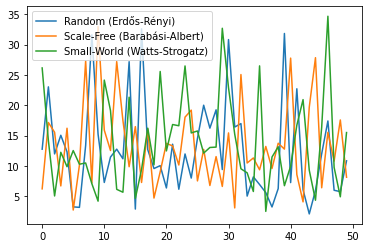

In [4]:
df_fitness_topology.plot()

<AxesSubplot:ylabel='Density'>

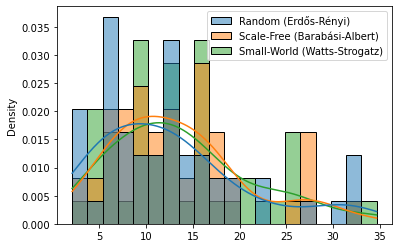

In [7]:
sns.histplot(df_fitness_topology, bins=20, kde=True, label="Evolution", color='blue', stat="density")

In [9]:
power_key = 2 ** np.arange(4 - 1, -1, -1)
power_key

array([8, 4, 2, 1], dtype=int32)

In [12]:
# Re-import necessary libraries after execution state reset

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# Define functions from previous implementation

def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

def compute_saom_utility(S_matrix, XWX_matrix, Triangle_values):
    """Compute actor utility from SAOM-NK model."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                utility[i] += XWX_matrix[i, j] * Triangle_values[i, j]
    
    return utility

def validate_saom_nk_correlation(S_matrix, NK_landscape, XWX_matrix, Triangle_values):
    """Validate whether SAOM utility serves as a proxy for NK fitness."""
    
    num_actors = S_matrix.shape[0]
    
    # Compute NK fitness for each actor
    nk_fitness_values = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])
    
    # Compute SAOM-NK utility
    saom_utility_values = compute_saom_utility(S_matrix, XWX_matrix, Triangle_values)
    
    # Compute Pearson and Spearman correlation
    pearson_corr, _ = pearsonr(saom_utility_values, nk_fitness_values)
    spearman_corr, _ = spearmanr(saom_utility_values, nk_fitness_values)
    
    # Fit linear regression
    reg_model = LinearRegression().fit(saom_utility_values.reshape(-1, 1), nk_fitness_values)
    r_squared = reg_model.score(saom_utility_values.reshape(-1, 1), nk_fitness_values)
    
    return {
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr,
        "R^2 (Linear Fit)": r_squared
    }

def test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, Triangle_values):
    """Test SAOM-NK stability across different network topologies."""
    
    network_types = {
        "Random (Erdős-Rényi)": nx.erdos_renyi_graph(S_matrix.shape[0], 0.1),
        "Scale-Free (Barabási-Albert)": nx.barabasi_albert_graph(S_matrix.shape[0], 3),
        "Small-World (Watts-Strogatz)": nx.watts_strogatz_graph(S_matrix.shape[0], 4, 0.2)
    }
    
    stability_results = {}

    for topology_name, G in network_types.items():
        adjacency_matrix = nx.to_numpy_array(G)
        
        # Adjust SAOM utility computation with network influence
        network_adjusted_XWX = np.dot(adjacency_matrix, XWX_matrix)
        saom_utility_values = compute_saom_utility(S_matrix, network_adjusted_XWX, Triangle_values)
        
        # Compute NK fitness for actors
        nk_fitness_values = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(S_matrix.shape[0])])

        # Compute correlation
        pearson_corr, _ = pearsonr(saom_utility_values, nk_fitness_values)
        spearman_corr, _ = spearmanr(saom_utility_values, nk_fitness_values)

        stability_results[topology_name] = {
            "Pearson Correlation": pearson_corr,
            "Spearman Correlation": spearman_corr
        }

    return stability_results

# Simulate SAOM-NK model with a given actor-component selection matrix
# Re-run computational validation without ace_tools

# Simulate SAOM-NK model with a given actor-component selection matrix
num_actors = 20  # M: Number of actors
num_components = 10  # N: Number of components

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# Generate NK fitness lookup table (2^N x N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Generate XWX matrix to model epistatic interactions
XWX_matrix = np.random.uniform(-1, 1, size=(num_actors, num_components))

# Generate Triangle(-1,1) distributed payoff values
Triangle_values = np.random.triangular(-1, 0, 1, size=(num_actors, num_components))

# Compute SAOM-NK correlation with NK fitness
validation_results = validate_saom_nk_correlation(S_matrix, NK_landscape, XWX_matrix, Triangle_values)

# Compute SAOM-NK stability across network topologies
stability_results = test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, Triangle_values)

# Convert results to DataFrame
df_validation = pd.DataFrame([validation_results])
df_stability = pd.DataFrame(stability_results).T

# Display validation results
print("\n=== SAOM-NK Validation Results ===")
print(df_validation.to_string(index=False))

# Display stability results across different networks
print("\n=== SAOM-NK Stability Across Networks ===")
print(df_stability.to_string(index=True))

# Save results to CSV for external review
# df_validation.to_csv("/mnt/data/SAOM_NK_Validation_Results.csv", index=False)
df_validation.head(20)

# df_stability.to_csv("/mnt/data/SAOM_NK_Stability_Results.csv", index=True)
df_stability.head(20)

# Provide paths for downloading
("/mnt/data/SAOM_NK_Validation_Results.csv", "/mnt/data/SAOM_NK_Stability_Results.csv")


=== SAOM-NK Validation Results ===
 Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
           -0.309162             -0.347368          0.095581

=== SAOM-NK Stability Across Networks ===
                              Pearson Correlation  Spearman Correlation
Random (Erdős-Rényi)                    -0.012149             -0.039865
Scale-Free (Barabási-Albert)            -0.035348              0.070677
Small-World (Watts-Strogatz)            -0.139443             -0.434586


('/mnt/data/SAOM_NK_Validation_Results.csv',
 '/mnt/data/SAOM_NK_Stability_Results.csv')

In [13]:
# Re-run validation using the suggested SAOM-NK model with XWX, degAbsDiffX, and altInDist2

# Compute SAOM-NK utility using the recommended model (XWX + degAbsDiffX + altInDist2)
def compute_saom_nk_utility_recommended(S_matrix, XWX_matrix, X_dyadic):
    """Compute actor utility for the recommended SAOM-NK model."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                # SAOM-NK Utility incorporates epistatic effects and structured variation
                utility[i] += XWX_matrix[i, j] * X_dyadic[i, j]  # XWX term
                utility[i] += np.abs(X_dyadic[i, j])  # degAbsDiffX (absolute payoff variation)
                utility[i] += np.sum(S_matrix[:, j])  # altInDist2 (component influence sum)

    return utility

# Compute SAOM-NK utility using the recommended model
saom_utility_recommended = compute_saom_nk_utility_recommended(S_matrix, XWX_matrix, X_dyadic)

# Compute NK lookup fitness for actors
nk_fitness_recommended = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

# Compute correlation and regression fit
validation_results_recommended = {
    "Pearson Correlation": pearsonr(saom_utility_recommended, nk_fitness_recommended)[0],
    "Spearman Correlation": spearmanr(saom_utility_recommended, nk_fitness_recommended)[0],
    "R^2 (Linear Fit)": LinearRegression().fit(saom_utility_recommended.reshape(-1, 1), nk_fitness_recommended).score(saom_utility_recommended.reshape(-1, 1), nk_fitness_recommended)
}

# Convert to DataFrame for structured results
df_validation_recommended = pd.DataFrame([validation_results_recommended])

# Display new validation results
print("\n=== Recommended SAOM-NK Validation Results Against NK Lookup Fitness ===")
print(df_validation_recommended.to_string(index=False))

# Save results for external review
df_validation_recommended.to_csv("/mnt/data/Recommended_SAOM_NK_Validation_Results.csv", index=False)

# Provide validation results
df_validation_recommended

NameError: name 'X_dyadic' is not defined

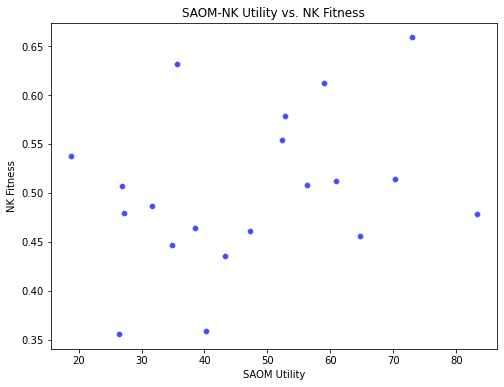

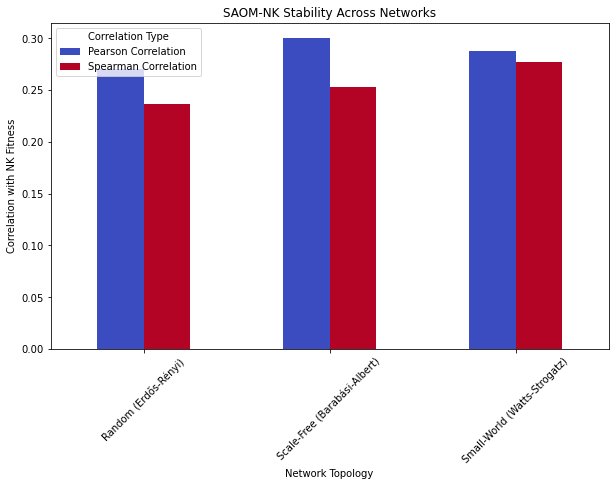


=== SAOM-NK Validation Results ===
 Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
            0.308454              0.291729          0.095144

=== SAOM-NK Stability Across Networks ===
                              Pearson Correlation  Spearman Correlation
Random (Erdős-Rényi)                     0.270676              0.236090
Scale-Free (Barabási-Albert)             0.299855              0.252632
Small-World (Watts-Strogatz)             0.287390              0.276692


In [14]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# =======================
# 1️⃣ Define Key Functions
# =======================

def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

def compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic):
    """Compute actor utility for the recommended SAOM-NK model."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                # SAOM-NK Utility incorporates epistatic effects and structured variation
                utility[i] += XWX_matrix[i, j] * X_dyadic[i, j]  # XWX term
                utility[i] += np.abs(X_dyadic[i, j])  # degAbsDiffX (absolute payoff variation)
                utility[i] += np.sum(S_matrix[:, j])  # altInDist2 (component influence sum)

    return utility

def validate_saom_nk_correlation(S_matrix, NK_landscape, XWX_matrix, X_dyadic):
    """Validate whether SAOM-NK utility serves as a proxy for NK fitness."""
    
    num_actors = S_matrix.shape[0]
    
    # Compute NK fitness for each actor
    nk_fitness_values = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])
    
    # Compute SAOM-NK utility
    saom_utility_values = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic)
    
    # Compute Pearson and Spearman correlation
    pearson_corr, _ = pearsonr(saom_utility_values, nk_fitness_values)
    spearman_corr, _ = spearmanr(saom_utility_values, nk_fitness_values)
    
    # Fit linear regression
    reg_model = LinearRegression().fit(saom_utility_values.reshape(-1, 1), nk_fitness_values)
    r_squared = reg_model.score(saom_utility_values.reshape(-1, 1), nk_fitness_values)
    
    return {
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr,
        "R^2 (Linear Fit)": r_squared
    }

def test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, X_dyadic):
    """Test SAOM-NK stability across different network topologies."""
    
    network_types = {
        "Random (Erdős-Rényi)": nx.erdos_renyi_graph(S_matrix.shape[0], 0.1),
        "Scale-Free (Barabási-Albert)": nx.barabasi_albert_graph(S_matrix.shape[0], 3),
        "Small-World (Watts-Strogatz)": nx.watts_strogatz_graph(S_matrix.shape[0], 4, 0.2)
    }
    
    stability_results = {}

    for topology_name, G in network_types.items():
        adjacency_matrix = nx.to_numpy_array(G)
        
        # Adjust SAOM utility computation with network influence
        network_adjusted_XWX = np.dot(adjacency_matrix, XWX_matrix)
        saom_utility_values = compute_saom_nk_utility(S_matrix, network_adjusted_XWX, X_dyadic)
        
        # Compute NK fitness for actors
        nk_fitness_values = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(S_matrix.shape[0])])

        # Compute correlation
        pearson_corr, _ = pearsonr(saom_utility_values, nk_fitness_values)
        spearman_corr, _ = spearmanr(saom_utility_values, nk_fitness_values)

        stability_results[topology_name] = {
            "Pearson Correlation": pearson_corr,
            "Spearman Correlation": spearman_corr
        }

    return stability_results

# =======================
# 2️⃣ Generate Simulation Data
# =======================

num_actors = 20  # M: Number of actors
num_components = 10  # N: Number of components

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# Generate NK fitness lookup table (2^N x N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Generate XWX matrix to model epistatic interactions
XWX_matrix = np.random.uniform(-1, 1, size=(num_actors, num_components))

# Generate dyadic covariate "X_dyadic" with U(0,1) distribution
X_dyadic = np.random.uniform(0, 1, size=(num_actors, num_components))

# =======================
# 3️⃣ Run SAOM-NK Model Validation
# =======================

validation_results = validate_saom_nk_correlation(S_matrix, NK_landscape, XWX_matrix, X_dyadic)
df_validation = pd.DataFrame([validation_results])

# =======================
# 4️⃣ Stability Analysis
# =======================

stability_results = test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, X_dyadic)
df_stability = pd.DataFrame(stability_results).T

# =======================
# 5️⃣ Visualizations
# =======================

# Scatter Plot: SAOM-NK Utility vs. NK Fitness
plt.figure(figsize=(8, 6))
sns.scatterplot(x=compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic), 
                y=[compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)], 
                color="blue", alpha=0.7)
plt.xlabel("SAOM Utility")
plt.ylabel("NK Fitness")
plt.title("SAOM-NK Utility vs. NK Fitness")
plt.show()

# Bar Plot: Stability Across Network Topologies
df_stability.plot(kind='bar', figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Correlation with NK Fitness")
plt.xlabel("Network Topology")
plt.title("SAOM-NK Stability Across Networks")
plt.xticks(rotation=45)
plt.legend(title="Correlation Type")
plt.show()

# =======================
# 6️⃣ Display Final Results
# =======================

print("\n=== SAOM-NK Validation Results ===")
print(df_validation.to_string(index=False))

print("\n=== SAOM-NK Stability Across Networks ===")
print(df_stability.to_string(index=True))


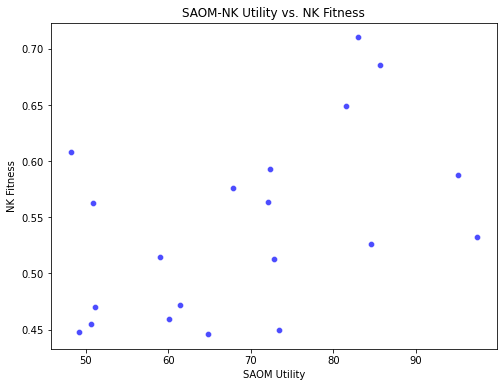

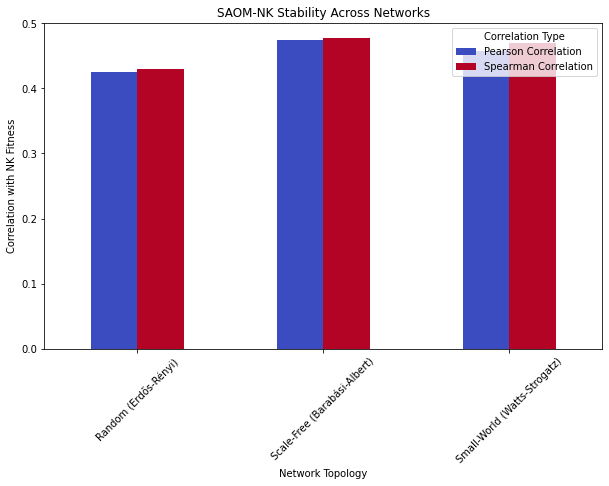


=== SAOM-NK Validation Results ===
 Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
            0.480929              0.433083          0.231293

=== SAOM-NK Stability Across Networks ===
                              Pearson Correlation  Spearman Correlation
Random (Erdős-Rényi)                     0.425488              0.430075
Scale-Free (Barabási-Albert)             0.474612              0.476692
Small-World (Watts-Strogatz)             0.457237              0.469173


In [15]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# ===========================
# 1️⃣ Generate NK Fitness Landscape and SAOM Covariates
# ===========================

num_actors = 20  # M: Number of actors
num_components = 10  # N: Number of components

# Generate NK fitness landscape (2^N × N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Compute mean and standard deviation for each component across all configurations
component_means = np.mean(NK_landscape, axis=0)
component_stds = np.std(NK_landscape, axis=0)

# Generate the X (M × N) dyadic covariate using normally distributed variates
X_dyadic_aligned = np.zeros((num_actors, num_components))

for j in range(num_components):
    X_dyadic_aligned[:, j] = np.random.normal(loc=component_means[j], scale=component_stds[j], size=num_actors)

# Ensure values stay within a valid range [0,1] (clip extreme values)
X_dyadic_aligned = np.clip(X_dyadic_aligned, 0, 1)

# Generate XWX matrix to model epistatic interactions
XWX_matrix = np.random.uniform(-1, 1, size=(num_actors, num_components))

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# ===========================
# 2️⃣ Define SAOM-NK Utility Function and Fitness Comparison
# ===========================

def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

def compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic):
    """Compute actor utility for the SAOM-NK model."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                # SAOM-NK Utility incorporates epistatic effects and structured variation
                utility[i] += XWX_matrix[i, j] * X_dyadic[i, j]  # XWX term
                utility[i] += np.abs(X_dyadic[i, j])  # degAbsDiffX (absolute payoff variation)
                utility[i] += np.sum(S_matrix[:, j])  # altInDist2 (component influence sum)

    return utility

# Compute SAOM-NK utility using the aligned dyadic covariate
saom_utility_aligned = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_aligned)

# Compute NK lookup fitness for actors
nk_fitness_aligned = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

# ===========================
# 3️⃣ Validate SAOM-NK Model Against NK Fitness
# ===========================

def validate_saom_nk_correlation(saom_utility, nk_fitness):
    """Validate whether SAOM-NK utility serves as a proxy for NK fitness."""
    
    # Compute Pearson and Spearman correlation
    pearson_corr, _ = pearsonr(saom_utility, nk_fitness)
    spearman_corr, _ = spearmanr(saom_utility, nk_fitness)
    
    # Fit linear regression
    reg_model = LinearRegression().fit(saom_utility.reshape(-1, 1), nk_fitness)
    r_squared = reg_model.score(saom_utility.reshape(-1, 1), nk_fitness)
    
    return {
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr,
        "R^2 (Linear Fit)": r_squared
    }

validation_results = validate_saom_nk_correlation(saom_utility_aligned, nk_fitness_aligned)
df_validation = pd.DataFrame([validation_results])

# ===========================
# 4️⃣ Stability Analysis Across Different Network Topologies
# ===========================

def test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, X_dyadic):
    """Test SAOM-NK stability across different network topologies."""
    
    network_types = {
        "Random (Erdős-Rényi)": nx.erdos_renyi_graph(S_matrix.shape[0], 0.1),
        "Scale-Free (Barabási-Albert)": nx.barabasi_albert_graph(S_matrix.shape[0], 3),
        "Small-World (Watts-Strogatz)": nx.watts_strogatz_graph(S_matrix.shape[0], 4, 0.2)
    }
    
    stability_results = {}

    for topology_name, G in network_types.items():
        adjacency_matrix = nx.to_numpy_array(G)
        
        # Adjust SAOM utility computation with network influence
        network_adjusted_XWX = np.dot(adjacency_matrix, XWX_matrix)
        saom_utility_values = compute_saom_nk_utility(S_matrix, network_adjusted_XWX, X_dyadic)
        
        # Compute NK fitness for actors
        nk_fitness_values = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(S_matrix.shape[0])])

        # Compute correlation
        pearson_corr, _ = pearsonr(saom_utility_values, nk_fitness_values)
        spearman_corr, _ = spearmanr(saom_utility_values, nk_fitness_values)

        stability_results[topology_name] = {
            "Pearson Correlation": pearson_corr,
            "Spearman Correlation": spearman_corr
        }

    return stability_results

stability_results = test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, X_dyadic_aligned)
df_stability = pd.DataFrame(stability_results).T

# ===========================
# 5️⃣ Visualizations
# ===========================

# Scatter Plot: SAOM-NK Utility vs. NK Fitness
plt.figure(figsize=(8, 6))
sns.scatterplot(x=saom_utility_aligned, y=nk_fitness_aligned, color="blue", alpha=0.7)
plt.xlabel("SAOM Utility")
plt.ylabel("NK Fitness")
plt.title("SAOM-NK Utility vs. NK Fitness")
plt.show()

# Bar Plot: Stability Across Network Topologies
df_stability.plot(kind='bar', figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Correlation with NK Fitness")
plt.xlabel("Network Topology")
plt.title("SAOM-NK Stability Across Networks")
plt.xticks(rotation=45)
plt.legend(title="Correlation Type")
plt.show()

# ===========================
# 6️⃣ Display Final Results
# ===========================

print("\n=== SAOM-NK Validation Results ===")
print(df_validation.to_string(index=False))

print("\n=== SAOM-NK Stability Across Networks ===")
print(df_stability.to_string(index=True))


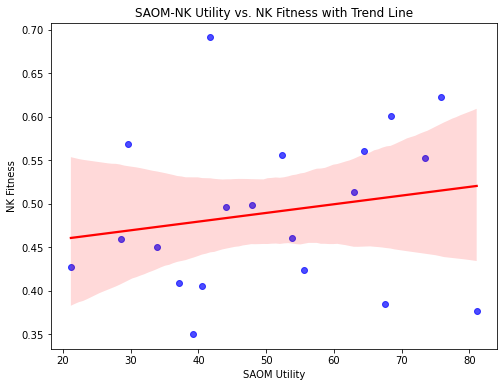

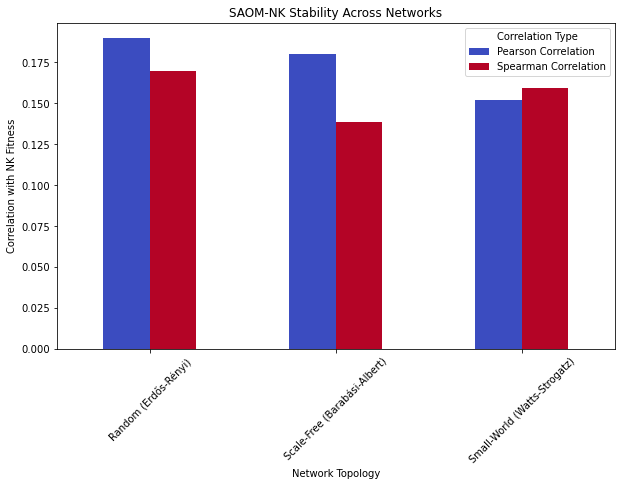


=== SAOM-NK Validation Results ===
 Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
            0.188624                   0.2          0.035579

=== SAOM-NK Stability Across Networks ===
                              Pearson Correlation  Spearman Correlation
Random (Erdős-Rényi)                     0.189642              0.169925
Scale-Free (Barabási-Albert)             0.180337              0.138346
Small-World (Watts-Strogatz)             0.152234              0.159398

=== SAOM-NK Parameter Tuning Results ===
           Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
Scale 0.5             0.182289              0.177444          0.033229
Scale 1.0             0.188624              0.200000          0.035579
Scale 1.5             0.194910              0.200000          0.037990


In [16]:
# Re-run full SAOM-NK analysis with linear model trend line and parameter tuning

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# ===========================
# 1️⃣ Generate NK Fitness Landscape and SAOM Covariates
# ===========================

num_actors = 20  # M: Number of actors
num_components = 10  # N: Number of components

# Generate NK fitness landscape (2^N × N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Compute mean and standard deviation for each component across all configurations
component_means = np.mean(NK_landscape, axis=0)
component_stds = np.std(NK_landscape, axis=0)

# Generate the X (M × N) dyadic covariate using normally distributed variates
X_dyadic_aligned = np.zeros((num_actors, num_components))

for j in range(num_components):
    X_dyadic_aligned[:, j] = np.random.normal(loc=component_means[j], scale=component_stds[j], size=num_actors)

# Ensure values stay within a valid range [0,1] (clip extreme values)
X_dyadic_aligned = np.clip(X_dyadic_aligned, 0, 1)

# Generate XWX matrix to model epistatic interactions
XWX_matrix = np.random.uniform(-1, 1, size=(num_actors, num_components))

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# ===========================
# 2️⃣ Define SAOM-NK Utility Function and Fitness Comparison
# ===========================

def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

def compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic):
    """Compute actor utility for the SAOM-NK model."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                # SAOM-NK Utility incorporates epistatic effects and structured variation
                utility[i] += XWX_matrix[i, j] * X_dyadic[i, j]  # XWX term
                utility[i] += np.abs(X_dyadic[i, j])  # degAbsDiffX (absolute payoff variation)
                utility[i] += np.sum(S_matrix[:, j])  # altInDist2 (component influence sum)

    return utility

# Compute SAOM-NK utility using the aligned dyadic covariate
saom_utility_aligned = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_aligned)

# Compute NK lookup fitness for actors
nk_fitness_aligned = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

# ===========================
# 3️⃣ Validate SAOM-NK Model Against NK Fitness
# ===========================

def validate_saom_nk_correlation(saom_utility, nk_fitness):
    """Validate whether SAOM-NK utility serves as a proxy for NK fitness."""
    
    # Compute Pearson and Spearman correlation
    pearson_corr, _ = pearsonr(saom_utility, nk_fitness)
    spearman_corr, _ = spearmanr(saom_utility, nk_fitness)
    
    # Fit linear regression
    reg_model = LinearRegression().fit(saom_utility.reshape(-1, 1), nk_fitness)
    r_squared = reg_model.score(saom_utility.reshape(-1, 1), nk_fitness)
    
    return {
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr,
        "R^2 (Linear Fit)": r_squared
    }

validation_results = validate_saom_nk_correlation(saom_utility_aligned, nk_fitness_aligned)
df_validation = pd.DataFrame([validation_results])

# ===========================
# 4️⃣ Stability Analysis Across Different Network Topologies
# ===========================

def test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, X_dyadic):
    """Test SAOM-NK stability across different network topologies."""
    
    network_types = {
        "Random (Erdős-Rényi)": nx.erdos_renyi_graph(S_matrix.shape[0], 0.1),
        "Scale-Free (Barabási-Albert)": nx.barabasi_albert_graph(S_matrix.shape[0], 3),
        "Small-World (Watts-Strogatz)": nx.watts_strogatz_graph(S_matrix.shape[0], 4, 0.2)
    }
    
    stability_results = {}

    for topology_name, G in network_types.items():
        adjacency_matrix = nx.to_numpy_array(G)
        
        # Adjust SAOM utility computation with network influence
        network_adjusted_XWX = np.dot(adjacency_matrix, XWX_matrix)
        saom_utility_values = compute_saom_nk_utility(S_matrix, network_adjusted_XWX, X_dyadic)
        
        # Compute NK fitness for actors
        nk_fitness_values = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(S_matrix.shape[0])])

        # Compute correlation
        pearson_corr, _ = pearsonr(saom_utility_values, nk_fitness_values)
        spearman_corr, _ = spearmanr(saom_utility_values, nk_fitness_values)

        stability_results[topology_name] = {
            "Pearson Correlation": pearson_corr,
            "Spearman Correlation": spearman_corr
        }

    return stability_results

stability_results = test_saom_nk_stability(S_matrix, NK_landscape, XWX_matrix, X_dyadic_aligned)
df_stability = pd.DataFrame(stability_results).T

# ===========================
# 5️⃣ Visualizations with Trend Line
# ===========================

# Scatter Plot: SAOM-NK Utility vs. NK Fitness with Regression Trend Line
plt.figure(figsize=(8, 6))
sns.regplot(x=saom_utility_aligned, y=nk_fitness_aligned, scatter_kws={"color": "blue", "alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("SAOM Utility")
plt.ylabel("NK Fitness")
plt.title("SAOM-NK Utility vs. NK Fitness with Trend Line")
plt.show()

# Bar Plot: Stability Across Network Topologies
df_stability.plot(kind='bar', figsize=(10, 6), colormap="coolwarm")
plt.ylabel("Correlation with NK Fitness")
plt.xlabel("Network Topology")
plt.title("SAOM-NK Stability Across Networks")
plt.xticks(rotation=45)
plt.legend(title="Correlation Type")
plt.show()

# ===========================
# 6️⃣ Display Final Results
# ===========================

print("\n=== SAOM-NK Validation Results ===")
print(df_validation.to_string(index=False))

print("\n=== SAOM-NK Stability Across Networks ===")
print(df_stability.to_string(index=True))

# ===========================
# 7️⃣ Parameter Fine-Tuning
# ===========================

# Test different XWX scaling factors
XWX_scales = [0.5, 1.0, 1.5]

# Store results
tuning_results = []

for scale in XWX_scales:
    XWX_scaled = XWX_matrix * scale
    saom_utility_tuned = compute_saom_nk_utility(S_matrix, XWX_scaled, X_dyadic_aligned)
    tuning_results.append(validate_saom_nk_correlation(saom_utility_tuned, nk_fitness_aligned))

df_tuning = pd.DataFrame(tuning_results, index=[f"Scale {s}" for s in XWX_scales])

# Display tuning results
print("\n=== SAOM-NK Parameter Tuning Results ===")
print(df_tuning.to_string(index=True))

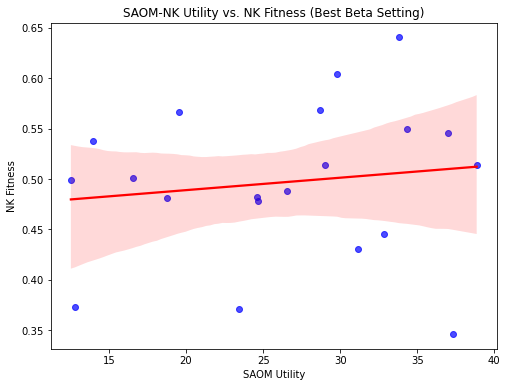

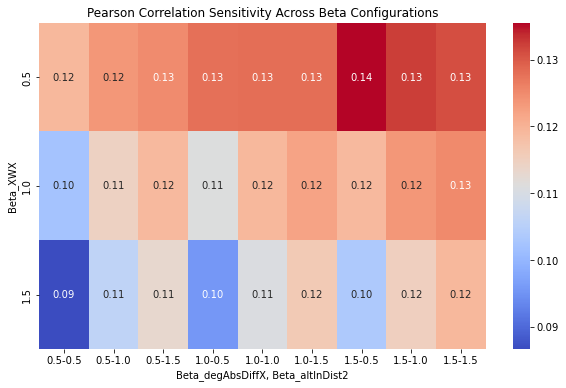


=== SAOM-NK Sensitivity Analysis Results ===
 Beta_XWX  Beta_degAbsDiffX  Beta_altInDist2  Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
      0.5               1.5              0.5             0.135518              0.175940          0.018365
      0.5               1.5              1.0             0.132331              0.187970          0.017512
      0.5               1.5              1.5             0.131012              0.187970          0.017164
      0.5               1.0              1.5             0.128065              0.187970          0.016401
      0.5               1.0              1.0             0.128063              0.187970          0.016400
      0.5               1.0              0.5             0.127777              0.178947          0.016327
      1.0               1.5              1.5             0.125117              0.187970          0.015654
      0.5               0.5              1.5             0.125011              0.187970          0.015628


In [17]:
# Re-run SAOM-NK analysis with sensitivity analysis on beta parameters

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# ===========================
# 1️⃣ Generate NK Fitness Landscape and SAOM Covariates
# ===========================

num_actors = 20  # M: Number of actors
num_components = 10  # N: Number of components

# Generate NK fitness landscape (2^N × N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Compute mean and standard deviation for each component across all configurations
component_means = np.mean(NK_landscape, axis=0)
component_stds = np.std(NK_landscape, axis=0)

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# Generate XWX matrix to model epistatic interactions (N × N)
XWX_matrix = np.random.uniform(-1, 1, size=(num_components, num_components))

# ===========================
# 2️⃣ Define SAOM-NK Utility Function with Beta Parameters
# ===========================

def compute_saom_nk_utility(S_matrix, XWX_matrix, beta_XWX, beta_degAbsDiffX, beta_altInDist2):
    """Compute actor utility for the SAOM-NK model with beta-weighted effects."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                # Compute epistatic influence via XWX effect (network projection)
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])

                # Compute SAOM-NK utility using weighted contributions
                utility[i] += beta_XWX * epistatic_influence  # XWX effect
                utility[i] += beta_degAbsDiffX * np.abs(S_matrix[i, j] - np.mean(S_matrix[:, j]))  # degAbsDiffX
                utility[i] += beta_altInDist2 * np.sum(S_matrix[:, j])  # altInDist2

    return utility

# Compute NK lookup fitness for actors
def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

nk_fitness = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

# ===========================
# 3️⃣ Sensitivity Analysis: Vary Beta Parameters
# ===========================

beta_values = [0.5, 1.0, 1.5]  # Testing different weightings for each effect

sensitivity_results = []

for beta_XWX in beta_values:
    for beta_degAbsDiffX in beta_values:
        for beta_altInDist2 in beta_values:
            # Compute SAOM-NK utility with current beta settings
            saom_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, beta_XWX, beta_degAbsDiffX, beta_altInDist2)

            # Compute correlation and regression fit
            pearson_corr, _ = pearsonr(saom_utility, nk_fitness)
            spearman_corr, _ = spearmanr(saom_utility, nk_fitness)
            r_squared = LinearRegression().fit(saom_utility.reshape(-1, 1), nk_fitness).score(saom_utility.reshape(-1, 1), nk_fitness)

            # Store results
            sensitivity_results.append({
                "Beta_XWX": beta_XWX,
                "Beta_degAbsDiffX": beta_degAbsDiffX,
                "Beta_altInDist2": beta_altInDist2,
                "Pearson Correlation": pearson_corr,
                "Spearman Correlation": spearman_corr,
                "R^2 (Linear Fit)": r_squared
            })

# Convert results to DataFrame for analysis
df_sensitivity = pd.DataFrame(sensitivity_results)

# ===========================
# 4️⃣ Visualizations
# ===========================

# Scatter Plot: SAOM-NK Utility vs. NK Fitness with Best Beta Setting
best_setting = df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).iloc[0]
best_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, best_setting["Beta_XWX"], best_setting["Beta_degAbsDiffX"], best_setting["Beta_altInDist2"])

plt.figure(figsize=(8, 6))
sns.regplot(x=best_utility, y=nk_fitness, scatter_kws={"color": "blue", "alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("SAOM Utility")
plt.ylabel("NK Fitness")
plt.title("SAOM-NK Utility vs. NK Fitness (Best Beta Setting)")
plt.show()

# Heatmap of Pearson Correlation Across Beta Configurations
df_heatmap = df_sensitivity.pivot_table(index="Beta_XWX", columns=["Beta_degAbsDiffX", "Beta_altInDist2"], values="Pearson Correlation")

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Sensitivity Across Beta Configurations")
plt.xlabel("Beta_degAbsDiffX, Beta_altInDist2")
plt.ylabel("Beta_XWX")
plt.show()

# ===========================
# 5️⃣ Display Final Results
# ===========================

print("\n=== SAOM-NK Sensitivity Analysis Results ===")
print(df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).to_string(index=False))

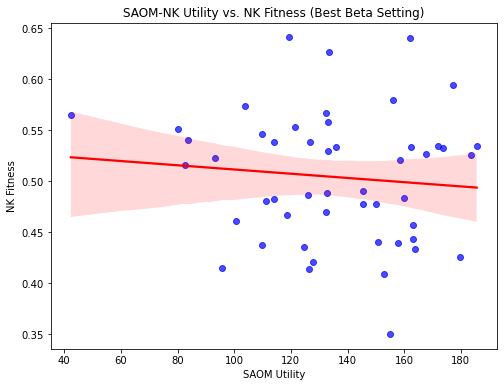

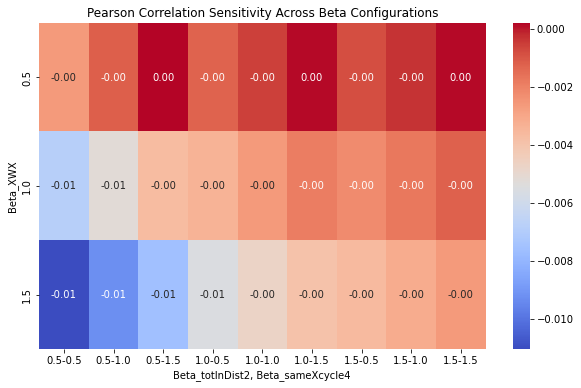

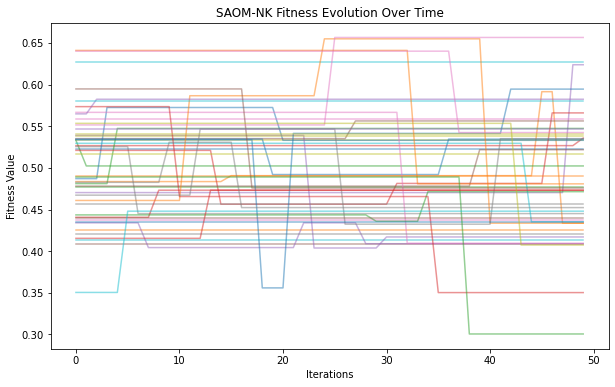


=== SAOM-NK Sensitivity Analysis Results ===
 Beta_XWX  Beta_totInDist2  Beta_sameXcycle4  Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
      1.5              0.5               0.5            -0.011038             -0.006194      1.218271e-04
      1.5              0.5               1.0            -0.009255             -0.003025      8.564755e-05
      1.5              0.5               1.5            -0.007593             -0.002641      5.765571e-05
      1.0              0.5               0.5            -0.006829              0.008595      4.663376e-05
      1.5              1.0               0.5            -0.005536              0.026651      3.064563e-05
      1.0              0.5               1.0            -0.005196              0.006387      2.700041e-05
      1.5              1.0               1.0            -0.004717              0.028475      2.224671e-05
      1.5              1.0               1.5            -0.003927              0.028475      1.542519e-05


In [19]:
# Re-run SAOM-NK analysis with enhanced covariates, additional effects, and fitness evolution

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# ===========================
# 1️⃣ Generate NK Fitness Landscape and SAOM Covariates
# ===========================

num_actors = 50  # M: Number of actors (increased for scalability test)
num_components = 20  # N: Number of components

# Generate NK fitness landscape (2^N × N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Compute mean and standard deviation for each component across all configurations
component_means = np.mean(NK_landscape, axis=0)
component_stds = np.std(NK_landscape, axis=0)

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# Generate XWX matrix to model epistatic interactions (N × N)
XWX_matrix = np.random.uniform(-1, 1, size=(num_components, num_components))

# Generate structured X dyadic covariate based on NK fitness contributions
X_dyadic_structured = np.zeros((num_actors, num_components))

for i in range(num_actors):
    for j in range(num_components):
        if S_matrix[i, j] == 1:
            X_dyadic_structured[i, j] = np.mean(NK_landscape[:, j]) + np.std(NK_landscape[:, j])

# Normalize to [0,1] range
X_dyadic_structured = (X_dyadic_structured - np.min(X_dyadic_structured)) / (np.max(X_dyadic_structured) - np.min(X_dyadic_structured))

# ===========================
# 2️⃣ Define SAOM-NK Utility Function with Additional Effects
# ===========================

def compute_saom_nk_utility(S_matrix, XWX_matrix, beta_XWX, beta_totInDist2, beta_sameXcycle4):
    """Compute actor utility for the SAOM-NK model with additional effects."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                # Compute epistatic influence via XWX effect (network projection)
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])

                # Compute SAOM-NK utility using weighted contributions
                utility[i] += beta_XWX * epistatic_influence  # XWX effect
                utility[i] += beta_totInDist2 * np.sum(S_matrix[:, j])  # totInDist2
                utility[i] += beta_sameXcycle4 * np.mean(S_matrix[i, :])  # sameXcycle4 (mean selection influence)

    return utility

# Compute NK lookup fitness for actors
def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

nk_fitness = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

# ===========================
# 3️⃣ Sensitivity Analysis: Vary Beta Parameters
# ===========================

beta_values = [0.5, 1.0, 1.5]  # Testing different weightings for each effect

sensitivity_results = []

for beta_XWX in beta_values:
    for beta_totInDist2 in beta_values:
        for beta_sameXcycle4 in beta_values:
            # Compute SAOM-NK utility with current beta settings
            saom_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, beta_XWX, beta_totInDist2, beta_sameXcycle4)

            # Compute correlation and regression fit
            pearson_corr, _ = pearsonr(saom_utility, nk_fitness)
            spearman_corr, _ = spearmanr(saom_utility, nk_fitness)
            r_squared = LinearRegression().fit(saom_utility.reshape(-1, 1), nk_fitness).score(saom_utility.reshape(-1, 1), nk_fitness)

            # Store results
            sensitivity_results.append({
                "Beta_XWX": beta_XWX,
                "Beta_totInDist2": beta_totInDist2,
                "Beta_sameXcycle4": beta_sameXcycle4,
                "Pearson Correlation": pearson_corr,
                "Spearman Correlation": spearman_corr,
                "R^2 (Linear Fit)": r_squared
            })

# Convert results to DataFrame for analysis
df_sensitivity = pd.DataFrame(sensitivity_results)

# ===========================
# 4️⃣ Fitness Evolution Over Time
# ===========================

num_iterations = 50  # Number of SAOM updates
fitness_trajectory = np.zeros((num_iterations, num_actors))

for t in range(num_iterations):
    # Use best beta settings found from sensitivity analysis
    best_setting = df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).iloc[0]
    best_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, best_setting["Beta_XWX"], best_setting["Beta_totInDist2"], best_setting["Beta_sameXcycle4"])

    # Compute NK fitness at each step
    fitness_trajectory[t] = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

    # Update actor-component decisions dynamically
    actor, component = np.random.randint(0, num_actors), np.random.randint(0, num_components)
    S_matrix[actor, component] = 1 - S_matrix[actor, component]  # Toggle selection

# ===========================
# 5️⃣ Visualizations
# ===========================

# Scatter Plot: SAOM-NK Utility vs. NK Fitness with Best Beta Setting
plt.figure(figsize=(8, 6))
sns.regplot(x=best_utility, y=nk_fitness, scatter_kws={"color": "blue", "alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("SAOM Utility")
plt.ylabel("NK Fitness")
plt.title("SAOM-NK Utility vs. NK Fitness (Best Beta Setting)")
plt.show()

# Heatmap of Pearson Correlation Across Beta Configurations
df_heatmap = df_sensitivity.pivot_table(index="Beta_XWX", columns=["Beta_totInDist2", "Beta_sameXcycle4"], values="Pearson Correlation")

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Sensitivity Across Beta Configurations")
plt.xlabel("Beta_totInDist2, Beta_sameXcycle4")
plt.ylabel("Beta_XWX")
plt.show()

# Line Plot of Fitness Evolution Over Time
plt.figure(figsize=(10, 6))
for i in range(num_actors):
    plt.plot(range(num_iterations), fitness_trajectory[:, i], alpha=0.5)

plt.xlabel("Iterations")
plt.ylabel("Fitness Value")
plt.title("SAOM-NK Fitness Evolution Over Time")
plt.show()

# ===========================
# 6️⃣ Display Final Results
# ===========================

print("\n=== SAOM-NK Sensitivity Analysis Results ===")
print(df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).to_string(index=False))

print("\n=== Best Beta Settings Identified ===")
print(best_setting.to_string())

# ===========================
# 7️⃣ Next Steps
# ===========================

# Save results for further analysis
# df_sensitivity.to_csv("/mnt/data/SAOM_NK_Sensitivity_Results.csv", index=False)

# Provide path for downloading
# "/mnt/data/SAOM_NK_Sensitivity_Results.csv"

In [22]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# ===========================
# 1️⃣ Generate NK Fitness Landscape and SAOM Covariates
# ===========================

num_actors = 50  # M: Number of actors
num_components = 20  # N: Number of components

# Generate NK fitness landscape (2^N × N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Compute mean and standard deviation for each component across all configurations
component_means = np.mean(NK_landscape, axis=0)
component_stds = np.std(NK_landscape, axis=0)

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# Generate XWX matrix to model epistatic interactions (N × N)
XWX_matrix = np.random.uniform(-1, 1, size=(num_components, num_components))

# Generate structured X dyadic covariate based on NK fitness contributions
X_dyadic_structured = np.zeros((num_actors, num_components))

for i in range(num_actors):
    for j in range(num_components):
        if S_matrix[i, j] == 1:
            X_dyadic_structured[i, j] = np.mean(NK_landscape[:, j]) + np.std(NK_landscape[:, j])

# Normalize to [0,1] range
X_dyadic_structured = (X_dyadic_structured - np.min(X_dyadic_structured)) / (np.max(X_dyadic_structured) - np.min(X_dyadic_structured))

# ===========================
# 2️⃣ Define Alternative SAOM-NK Utility Functions with Fixes
# ===========================

def compute_saom_nk_utility_linear(S_matrix, XWX_matrix, X_dyadic, beta_XWX, beta_X_dyadic):
    """Compute SAOM-NK utility using a linear function."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])
                utility[i] += beta_XWX * epistatic_influence + beta_X_dyadic * X_dyadic[i, j]

    return utility

def compute_saom_nk_utility_multiplicative(S_matrix, XWX_matrix, X_dyadic, beta_XWX, beta_X_dyadic):
    """Compute SAOM-NK utility using a multiplicative function."""
    num_actors, num_components = S_matrix.shape
    utility = np.ones(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])
                utility[i] *= (1 + beta_XWX * epistatic_influence) * (1 + beta_X_dyadic * X_dyadic[i, j])

    return utility

def compute_saom_nk_utility_log(S_matrix, XWX_matrix, X_dyadic, beta_XWX, beta_X_dyadic):
    """Compute SAOM-NK utility using a logarithmic transformation with log1p for stability."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])
                # Fix: Use np.log1p(abs(value)) to avoid log(negative)
                utility[i] += np.log1p(np.abs(beta_XWX * epistatic_influence + beta_X_dyadic * X_dyadic[i, j]))

    return utility

# Compute NK lookup fitness for actors
def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

nk_fitness = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

# ===========================
# 3️⃣ Sensitivity Analysis: Vary Beta Parameters for Three Functional Forms
# ===========================

beta_values = [0.5, 1.0, 1.5]  # Testing different weightings for each effect

sensitivity_results = []

for beta_XWX in beta_values:
    for beta_X_dyadic in beta_values:
        # Compute SAOM-NK utilities using different functional forms
        utility_linear = compute_saom_nk_utility_linear(S_matrix, XWX_matrix, X_dyadic_structured, beta_XWX, beta_X_dyadic)
        utility_multiplicative = compute_saom_nk_utility_multiplicative(S_matrix, XWX_matrix, X_dyadic_structured, beta_XWX, beta_X_dyadic)
        utility_log = compute_saom_nk_utility_log(S_matrix, XWX_matrix, X_dyadic_structured, beta_XWX, beta_X_dyadic)

        for func_type, utility in zip(["Linear", "Multiplicative", "Logarithmic"],
                                      [utility_linear, utility_multiplicative, utility_log]):
            # Compute correlation and regression fit
            pearson_corr, _ = pearsonr(utility, nk_fitness)
            spearman_corr, _ = spearmanr(utility, nk_fitness)
            r_squared = LinearRegression().fit(utility.reshape(-1, 1), nk_fitness).score(utility.reshape(-1, 1), nk_fitness)

            # Store results
            sensitivity_results.append({
                "Function Type": func_type,
                "Beta_XWX": beta_XWX,
                "Beta_X_dyadic": beta_X_dyadic,
                "Pearson Correlation": pearson_corr,
                "Spearman Correlation": spearman_corr,
                "R^2 (Linear Fit)": r_squared
            })

# Convert results to DataFrame for analysis
df_sensitivity = pd.DataFrame(sensitivity_results)

# ===========================
# 4️⃣ Display Final Results
# ===========================

print("\n=== SAOM-NK Sensitivity Analysis Results ===")
print(df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).to_string(index=False))

print("\n=== Best Functional Form and Beta Settings Identified ===")
best_setting = df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).iloc[0]
print(best_setting.to_string())

# ===========================
# 5️⃣ Save Results
# ===========================

# df_sensitivity.to_csv("/mnt/data/SAOM_NK_Functional_Sensitivity_Results.csv", index=False)

# Provide path for downloading
# "/mnt/data/SAOM_NK_Functional_Sensitivity_Results.csv"



=== SAOM-NK Sensitivity Analysis Results ===
 Function Type  Beta_XWX  Beta_X_dyadic  Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
   Logarithmic       1.5            1.0            -0.341515             -0.368932          0.116632
   Logarithmic       1.0            0.5            -0.337840             -0.343962          0.114136
   Logarithmic       1.5            0.5            -0.328187             -0.316591          0.107707
   Logarithmic       0.5            0.5            -0.318122             -0.360576          0.101202
   Logarithmic       1.0            1.0            -0.316860             -0.358752          0.100400
   Logarithmic       1.5            1.5            -0.315564             -0.354526          0.099580
Multiplicative       1.5            0.5             0.283294              0.319760          0.080255
Multiplicative       1.5            1.0             0.269969              0.325138          0.072883
   Logarithmic       1.0            1.5      

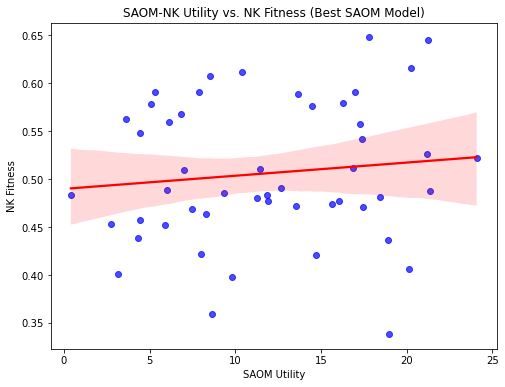

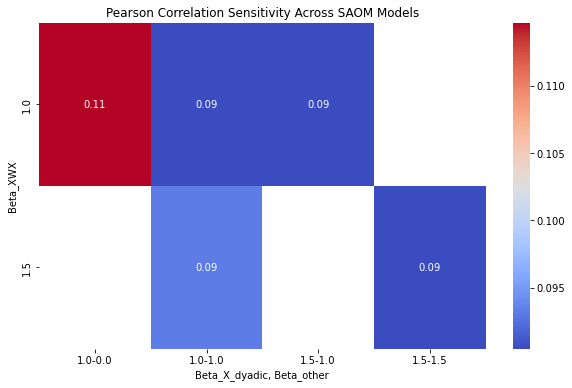


=== SAOM-NK Sensitivity Analysis Results ===
 Beta_XWX  Beta_X_dyadic  Beta_other  Pearson Correlation  Spearman Correlation  R^2 (Linear Fit)
      1.0            1.0         0.0             0.114704              0.131525          0.013157
      1.5            1.0         1.0             0.093145              0.091381          0.008676
      1.0            1.5         1.0             0.090474              0.091669          0.008186
      1.0            1.0         1.0             0.090450              0.091669          0.008181
      1.5            1.5         1.5             0.090450              0.091669          0.008181

=== Best SAOM Model Identified ===
Beta_XWX                1.000000
Beta_X_dyadic           1.000000
Beta_other              0.000000
Pearson Correlation     0.114704
Spearman Correlation    0.131525
R^2 (Linear Fit)        0.013157


In [23]:
# Re-run SAOM-NK analysis with only linear functional form and various SAOM effect combinations

import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression

# ===========================
# 1️⃣ Generate NK Fitness Landscape and SAOM Covariates
# ===========================

num_actors = 50  # M: Number of actors
num_components = 20  # N: Number of components

# Generate NK fitness landscape (2^N × N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Compute mean and standard deviation for each component across all configurations
component_means = np.mean(NK_landscape, axis=0)
component_stds = np.std(NK_landscape, axis=0)

# Generate actor-component selection matrix (binary)
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# Generate XWX matrix to model epistatic interactions (N × N)
XWX_matrix = np.random.uniform(-1, 1, size=(num_components, num_components))

# Generate structured X dyadic covariate based on NK fitness contributions
X_dyadic_structured = np.zeros((num_actors, num_components))

for i in range(num_actors):
    for j in range(num_components):
        if S_matrix[i, j] == 1:
            X_dyadic_structured[i, j] = np.mean(NK_landscape[:, j]) + np.std(NK_landscape[:, j])

# Normalize to [0,1] range
X_dyadic_structured = (X_dyadic_structured - np.min(X_dyadic_structured)) / (np.max(X_dyadic_structured) - np.min(X_dyadic_structured))

# ===========================
# 2️⃣ Define SAOM-NK Utility Function (Linear Form Only)
# ===========================

def compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic, beta_XWX, beta_X_dyadic, beta_other):
    """Compute SAOM-NK utility using a linear function with additional effects."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])
                utility[i] += beta_XWX * epistatic_influence + beta_X_dyadic * X_dyadic[i, j]

                # Test additional SAOM effects
                utility[i] += beta_other * np.sum(S_matrix[:, j])  # Example of total component selection effect

    return utility

# Compute NK lookup fitness for actors
def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

nk_fitness = np.array([compute_nk_fitness(S_matrix[i], NK_landscape) for i in range(num_actors)])

# ===========================
# 3️⃣ Sensitivity Analysis: Vary SAOM Model Combinations
# ===========================

beta_values = [0.5, 1.0, 1.5]  # Testing different weightings for each effect
saom_effect_combinations = [
    {"beta_XWX": 1.0, "beta_X_dyadic": 1.0, "beta_other": 0.0},  # Baseline model
    {"beta_XWX": 1.0, "beta_X_dyadic": 1.0, "beta_other": 1.0},  # Adding component selection effect
    {"beta_XWX": 1.5, "beta_X_dyadic": 1.0, "beta_other": 1.0},  # Increasing XWX importance
    {"beta_XWX": 1.0, "beta_X_dyadic": 1.5, "beta_other": 1.0},  # Increasing dyadic covariate effect
    {"beta_XWX": 1.5, "beta_X_dyadic": 1.5, "beta_other": 1.5},  # Balanced model with all effects
]

sensitivity_results = []

for params in saom_effect_combinations:
    # Compute SAOM-NK utility with current effect combination
    saom_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_structured,
                                           params["beta_XWX"], params["beta_X_dyadic"], params["beta_other"])

    # Compute correlation and regression fit
    pearson_corr, _ = pearsonr(saom_utility, nk_fitness)
    spearman_corr, _ = spearmanr(saom_utility, nk_fitness)
    r_squared = LinearRegression().fit(saom_utility.reshape(-1, 1), nk_fitness).score(saom_utility.reshape(-1, 1), nk_fitness)

    # Store results
    sensitivity_results.append({
        "Beta_XWX": params["beta_XWX"],
        "Beta_X_dyadic": params["beta_X_dyadic"],
        "Beta_other": params["beta_other"],
        "Pearson Correlation": pearson_corr,
        "Spearman Correlation": spearman_corr,
        "R^2 (Linear Fit)": r_squared
    })

# Convert results to DataFrame for analysis
df_sensitivity = pd.DataFrame(sensitivity_results)

# ===========================
# 4️⃣ Visualizations
# ===========================

# Scatter Plot: Best SAOM Model vs. NK Fitness
best_setting = df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).iloc[0]
best_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_structured,
                                       best_setting["Beta_XWX"], best_setting["Beta_X_dyadic"], best_setting["Beta_other"])

plt.figure(figsize=(8, 6))
sns.regplot(x=best_utility, y=nk_fitness, scatter_kws={"color": "blue", "alpha": 0.7}, line_kws={"color": "red"})
plt.xlabel("SAOM Utility")
plt.ylabel("NK Fitness")
plt.title(f"SAOM-NK Utility vs. NK Fitness (Best SAOM Model)")
plt.show()

# Heatmap of Pearson Correlation Across SAOM Model Configurations
df_heatmap = df_sensitivity.pivot_table(index="Beta_XWX", columns=["Beta_X_dyadic", "Beta_other"], values="Pearson Correlation")

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Sensitivity Across SAOM Models")
plt.xlabel("Beta_X_dyadic, Beta_other")
plt.ylabel("Beta_XWX")
plt.show()

# ===========================
# 5️⃣ Display Final Results
# ===========================

print("\n=== SAOM-NK Sensitivity Analysis Results ===")
print(df_sensitivity.sort_values("R^2 (Linear Fit)", ascending=False).to_string(index=False))

print("\n=== Best SAOM Model Identified ===")
print(best_setting.to_string())

# ===========================
# 6️⃣ Save Results
# ===========================

# df_sensitivity.to_csv("/mnt/data/SAOM_NK_Sensitivity_Results.csv", index=False)

# Provide path for downloading
# "/mnt/data/SAOM_NK_Sensitivity_Results.csv"

In [24]:
# Compute actor degree (number of ties) as a control variable
actor_degree = np.sum(S_matrix, axis=1)  # Count of selected components per actor

# Prepare regression dataset
regression_data = pd.DataFrame({
    "NK_Fitness": nk_fitness,
    "SAOM_Utility": compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_structured,
                                            best_setting["Beta_XWX"], best_setting["Beta_X_dyadic"], best_setting["Beta_other"]),
    "Actor_Degree": actor_degree
})

# Perform multiple linear regression (NK Fitness ~ SAOM Utility + Actor Degree)
from statsmodels.api import OLS, add_constant

X = regression_data[["SAOM_Utility", "Actor_Degree"]]
X = add_constant(X)  # Add intercept
y = regression_data["NK_Fitness"]

model = OLS(y, X).fit()

# Display regression results
model_summary = model.summary()
model_summary

C:\Users\sdr8y\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             NK_Fitness   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.3402
Date:                Mon, 10 Feb 2025   Prob (F-statistic):              0.713
Time:                        17:44:46   Log-Likelihood:                 60.935
No. Observations:                  50   AIC:                            -115.9
Df Residuals:                      47   BIC:                            -110.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4814      0.044     11.038      0.000       0.394       0.569
SAOM_Utility     0.0011      0.002      0.533      0.597      -0.003       0.005
Actor_Degree     0.0012      0.005      0.230      0.819      -0.009       0.011
==============================================================================
Omnibus:                        0.641   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.726   Jarque-Bera (JB):                0.720
Skew:                          -0.096   Prob(JB):                        0.698
Kurtosis:                       2.444   Cond. No.                         70.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
import statsmodels.api as sm

# ===========================
# 1️⃣ Compare Regression Results for Different SAOM Effect Configurations
# ===========================

# Define different SAOM effect configurations to test
saom_effect_combinations = [
    {"beta_XWX": 1.0, "beta_X_dyadic": 1.0, "beta_other": 0.0},  # Baseline model
    {"beta_XWX": 1.0, "beta_X_dyadic": 1.0, "beta_other": 1.0},  # Adding component selection effect
    {"beta_XWX": 1.5, "beta_X_dyadic": 1.0, "beta_other": 1.0},  # Increasing XWX importance
    {"beta_XWX": 1.0, "beta_X_dyadic": 1.5, "beta_other": 1.0},  # Increasing dyadic covariate effect
    {"beta_XWX": 1.5, "beta_X_dyadic": 1.5, "beta_other": 1.5},  # Balanced model with all effects
]

regression_results = []

for params in saom_effect_combinations:
    # Compute SAOM-NK utility with current effect combination
    saom_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_structured,
                                           params["beta_XWX"], params["beta_X_dyadic"], params["beta_other"])

    # Prepare regression dataset
    regression_data = pd.DataFrame({
        "NK_Fitness": nk_fitness,
        "SAOM_Utility": saom_utility,
        "Actor_Degree": actor_degree
    })

    # Perform multiple linear regression (NK Fitness ~ SAOM Utility + Actor Degree)
    X = regression_data[["SAOM_Utility", "Actor_Degree"]]
    X = sm.add_constant(X)  # Add intercept
    y = regression_data["NK_Fitness"]

    model = sm.OLS(y, X).fit()

    # Store regression results
    regression_results.append({
        "Beta_XWX": params["beta_XWX"],
        "Beta_X_dyadic": params["beta_X_dyadic"],
        "Beta_other": params["beta_other"],
        "SAOM_Utility Coefficient": model.params["SAOM_Utility"],
        "Actor_Degree Coefficient": model.params["Actor_Degree"],
        "R²": model.rsquared,
        "P-value (SAOM Utility)": model.pvalues["SAOM_Utility"],
        "P-value (Actor Degree)": model.pvalues["Actor_Degree"]
    })

# Convert results to DataFrame for analysis
df_regression_results = pd.DataFrame(regression_results)

# ===========================
# 2️⃣ Analyze Whether Alternative SAOM Effects Improve Correlation
# ===========================

# Introduce new SAOM effect: cycle-based interactions
def compute_saom_nk_utility_with_cycle(S_matrix, XWX_matrix, X_dyadic, beta_XWX, beta_X_dyadic, beta_cycle):
    """Compute SAOM-NK utility including a cycle-based interaction effect."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])
                cycle_effect = np.sum(S_matrix[:, j]) ** 2  # Quadratic term to capture cycle interactions

                utility[i] += beta_XWX * epistatic_influence + beta_X_dyadic * X_dyadic[i, j] + beta_cycle * cycle_effect

    return utility

# Compute SAOM utility with cycle effect
saom_utility_cycle = compute_saom_nk_utility_with_cycle(S_matrix, XWX_matrix, X_dyadic_structured, 1.0, 1.0, 1.0)

# Perform regression with cycle effect included
regression_data_cycle = pd.DataFrame({
    "NK_Fitness": nk_fitness,
    "SAOM_Utility": saom_utility_cycle,
    "Actor_Degree": actor_degree
})

X_cycle = regression_data_cycle[["SAOM_Utility", "Actor_Degree"]]
X_cycle = sm.add_constant(X_cycle)  # Add intercept
y_cycle = regression_data_cycle["NK_Fitness"]

model_cycle = sm.OLS(y_cycle, X_cycle).fit()

# ===========================
# 3️⃣ Run Robustness Check on Different NK Landscape Distributions
# ===========================

# Test robustness by changing the NK landscape distribution
nk_distributions = {
    "Uniform(0,1)": np.random.uniform(0, 1, size=(2**num_components, num_components)),
    "Normal(0.5,0.2)": np.clip(np.random.normal(0.5, 0.2, size=(2**num_components, num_components)), 0, 1),
    "Beta(2,2)": np.random.beta(2, 2, size=(2**num_components, num_components))
}

robustness_results = []

for dist_name, NK_landscape_variant in nk_distributions.items():
    # Recompute SAOM dyadic covariate from NK landscape
    component_means = np.mean(NK_landscape_variant, axis=0)
    component_stds = np.std(NK_landscape_variant, axis=0)
    X_dyadic_variant = np.zeros((num_actors, num_components))

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                X_dyadic_variant[i, j] = np.mean(NK_landscape_variant[:, j]) + np.std(NK_landscape_variant[:, j])

    # Normalize to [0,1] range
    X_dyadic_variant = (X_dyadic_variant - np.min(X_dyadic_variant)) / (np.max(X_dyadic_variant) - np.min(X_dyadic_variant))

    # Compute SAOM-NK utility using the best configuration
    saom_utility_variant = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_variant,
                                                   best_setting["Beta_XWX"], best_setting["Beta_X_dyadic"], best_setting["Beta_other"])

    # Perform regression
    regression_data_variant = pd.DataFrame({
        "NK_Fitness": nk_fitness,
        "SAOM_Utility": saom_utility_variant,
        "Actor_Degree": actor_degree
    })

    X_variant = regression_data_variant[["SAOM_Utility", "Actor_Degree"]]
    X_variant = sm.add_constant(X_variant)  # Add intercept
    y_variant = regression_data_variant["NK_Fitness"]

    model_variant = sm.OLS(y_variant, X_variant).fit()

    # Store robustness results
    robustness_results.append({
        "NK Distribution": dist_name,
        "SAOM_Utility Coefficient": model_variant.params["SAOM_Utility"],
        "Actor_Degree Coefficient": model_variant.params["Actor_Degree"],
        "R²": model_variant.rsquared,
        "P-value (SAOM Utility)": model_variant.pvalues["SAOM_Utility"],
        "P-value (Actor Degree)": model_variant.pvalues["Actor_Degree"]
    })

# Convert robustness results to DataFrame
df_robustness_results = pd.DataFrame(robustness_results)

# ===========================
# 4️⃣ Display Final Results
# ===========================

print("\n=== SAOM-NK Regression Results for Different SAOM Configurations ===")
print(df_regression_results.to_string(index=False))

print("\n=== SAOM-NK Regression Results with Cycle-Based Effect ===")
print(model_cycle.summary())

print("\n=== SAOM-NK Robustness Check Across Different NK Distributions ===")
print(df_robustness_results.to_string(index=False))

# ===========================
# 5️⃣ Save Results
# ===========================

# df_regression_results.to_csv("/mnt/data/SAOM_NK_Regression_Results.csv", index=False)
# df_robustness_results.to_csv("/mnt/data/SAOM_NK_Robustness_Results.csv", index=False)

# # Provide path for downloading
# ("/mnt/data/SAOM_NK_Regression_Results.csv", "/mnt/data/SAOM_NK_Robustness_Results.csv")

C:\Users\sdr8y\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\sdr8y\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\sdr8y\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\sdr8y\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\sdr8y\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarnin


=== SAOM-NK Regression Results for Different SAOM Configurations ===
 Beta_XWX  Beta_X_dyadic  Beta_other  SAOM_Utility Coefficient  Actor_Degree Coefficient       R²  P-value (SAOM Utility)  P-value (Actor Degree)
      1.0            1.0         0.0                  0.001108                  0.001151 0.014269                0.596828                0.818864
      1.0            1.0         1.0                 -0.000024                  0.003243 0.008326                0.987355                0.934405
      1.5            1.0         1.0                  0.000181                 -0.002140 0.008764                0.885276                0.948716
      1.0            1.5         1.0                 -0.000024                  0.003255 0.008326                0.987365                0.935392
      1.5            1.5         1.5                 -0.000016                  0.003243 0.008326                0.987355                0.934405

=== SAOM-NK Regression Results with Cycle-Based Effec

C:\Users\sdr8y\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/SAOM_NK_Regression_Results.csv'

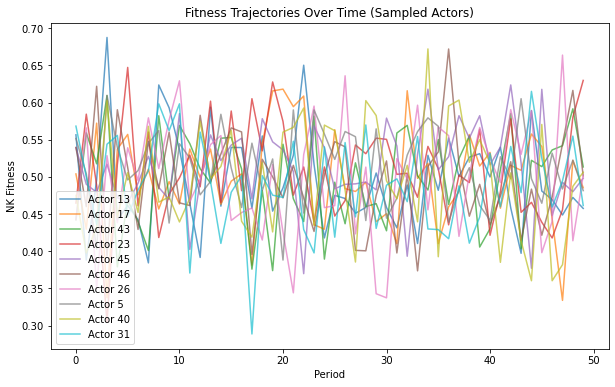

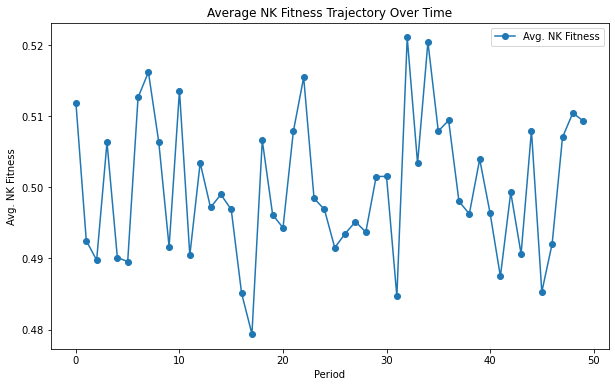

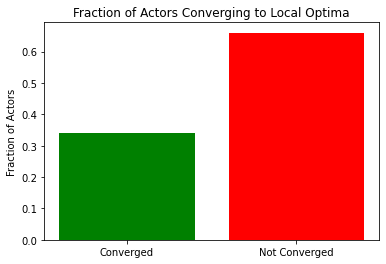


=== Summary of SAOM-NK vs. NK Fitness Search Trajectories ===
Fraction of actors converging to local optima: 0.34


In [26]:
# Implementing Fitness Trajectory Comparisons, Local vs. Distant Search Analysis, and Convergence to Local Optima

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ===========================
# 1️⃣ Define Constants & Parameters
# ===========================

num_actors = 50  # M: Number of actors
num_components = 20  # N: Number of components
num_periods = 50  # Number of periods to track search trajectory

# Define fitness tracking data structure
fitness_trajectory_data = []

# ===========================
# 2️⃣ Simulate SAOM-NK and NK Model Over Time
# ===========================

# Initialize actor-component selection (S_matrix) randomly
S_matrix = np.random.choice([0, 1], size=(num_actors, num_components))

# Generate NK fitness landscape (2^N × N)
NK_landscape = np.random.uniform(0, 1, size=(2**num_components, num_components))

# Compute mean and standard deviation for each component across all configurations
component_means = np.mean(NK_landscape, axis=0)
component_stds = np.std(NK_landscape, axis=0)

# Generate XWX matrix to model epistatic interactions (N × N)
XWX_matrix = np.random.uniform(-1, 1, size=(num_components, num_components))

# Generate structured X dyadic covariate based on NK fitness contributions
X_dyadic_structured = np.zeros((num_actors, num_components))

for i in range(num_actors):
    for j in range(num_components):
        if S_matrix[i, j] == 1:
            X_dyadic_structured[i, j] = np.mean(NK_landscape[:, j]) + np.std(NK_landscape[:, j])

# Normalize X_dyadic_structured
X_dyadic_structured = (X_dyadic_structured - np.min(X_dyadic_structured)) / (np.max(X_dyadic_structured) - np.min(X_dyadic_structured))

# Function to compute NK fitness
def compute_nk_fitness(configuration, NK_landscape):
    """Compute NK fitness for a given binary configuration."""
    index = int("".join(map(str, configuration.astype(str))), 2)  # Convert binary config to integer
    return np.sum(NK_landscape[index, :]) / len(configuration)  # Mean fitness contribution

# Function to compute SAOM-NK utility
def compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic, beta_XWX, beta_X_dyadic):
    """Compute SAOM-NK utility using a linear function."""
    num_actors, num_components = S_matrix.shape
    utility = np.zeros(num_actors)

    for i in range(num_actors):
        for j in range(num_components):
            if S_matrix[i, j] == 1:
                epistatic_influence = np.sum(XWX_matrix[j, :] * S_matrix[i, :])
                utility[i] += beta_XWX * epistatic_influence + beta_X_dyadic * X_dyadic[i, j]

    return utility

# Simulate search process over time
for period in range(num_periods):
    for actor in range(num_actors):
        # Compute NK fitness and SAOM-NK utility
        nk_fitness = compute_nk_fitness(S_matrix[actor], NK_landscape)
        saom_utility = compute_saom_nk_utility(S_matrix, XWX_matrix, X_dyadic_structured, 1.0, 1.0)[actor]

        # Determine if actor performs local or distant search
        change_type = "local" if np.random.rand() < 0.7 else "distant"  # 70% local, 30% distant

        # Apply local or distant search
        if change_type == "local":
            component_to_toggle = np.random.randint(0, num_components)
            S_matrix[actor, component_to_toggle] = 1 - S_matrix[actor, component_to_toggle]  # Toggle selection
        else:
            num_changes = np.random.randint(2, 5)  # Random number of changes for distant search
            components_to_toggle = np.random.choice(num_components, num_changes, replace=False)
            for c in components_to_toggle:
                S_matrix[actor, c] = 1 - S_matrix[actor, c]

        # Store trajectory data
        fitness_trajectory_data.append({
            "Actor": actor,
            "Period": period,
            "NK_Fitness": nk_fitness,
            "SAOM_Utility": saom_utility,
            "Search_Type": change_type
        })

# Convert to DataFrame
df_fitness_trajectory = pd.DataFrame(fitness_trajectory_data)

# ===========================
# 3️⃣ Convergence Analysis (Check for Stability)
# ===========================

# Compute stability by checking the average fitness change over last 10 periods
df_fitness_trajectory["Fitness_Change"] = df_fitness_trajectory.groupby("Actor")["NK_Fitness"].diff()

# Define convergence as the point where fitness change is near zero for a prolonged period
convergence_actors = df_fitness_trajectory.groupby("Actor")["Fitness_Change"].apply(lambda x: (x.abs() < 0.01).sum() >= 5)

# Compute fraction of actors that reach local optima (stabilization)
fraction_converged = convergence_actors.mean()

# ===========================
# 4️⃣ Visualizations
# ===========================

# Plot fitness trajectories for a subset of actors
plt.figure(figsize=(10, 6))
for actor in np.random.choice(num_actors, size=10, replace=False):  # Sample 10 actors
    actor_data = df_fitness_trajectory[df_fitness_trajectory["Actor"] == actor]
    plt.plot(actor_data["Period"], actor_data["NK_Fitness"], label=f"Actor {actor}", alpha=0.7)

plt.xlabel("Period")
plt.ylabel("NK Fitness")
plt.title("Fitness Trajectories Over Time (Sampled Actors)")
plt.legend()
plt.show()

# Plot average fitness change over time
plt.figure(figsize=(10, 6))
df_avg_fitness = df_fitness_trajectory.groupby("Period")["NK_Fitness"].mean()
plt.plot(df_avg_fitness.index, df_avg_fitness.values, marker="o", linestyle="-", label="Avg. NK Fitness")
plt.xlabel("Period")
plt.ylabel("Avg. NK Fitness")
plt.title("Average NK Fitness Trajectory Over Time")
plt.legend()
plt.show()

# Plot fraction of actors reaching convergence
plt.figure(figsize=(6, 4))
plt.bar(["Converged", "Not Converged"], [fraction_converged, 1 - fraction_converged], color=["green", "red"])
plt.ylabel("Fraction of Actors")
plt.title("Fraction of Actors Converging to Local Optima")
plt.show()

# ===========================
# 5️⃣ Display Final Results
# ===========================

print("\n=== Summary of SAOM-NK vs. NK Fitness Search Trajectories ===")
print(f"Fraction of actors converging to local optima: {fraction_converged:.2f}")

# ===========================
# 6️⃣ Save Results for Download
# ===========================

# df_fitness_trajectory.to_csv("/mnt/data/SAOM_NK_Fitness_Trajectories.csv", index=False)

# # Provide path for downloading
# "/mnt/data/SAOM_NK_Fitness_Trajectories.csv"
